In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import warnings
import string
import re
import os
SEED = 24
stopwords = stopwords.words('english')
warnings.filterwarnings('ignore')
%matplotlib inline
# from src import helper_functions as helpers
import sys  
sys.path.insert(0, r'C:\Users\acer\Desktop\Final Project1\src')

import helper_functions as helpers


In [2]:
path = r"C:\Users\acer\HateSpeechAndOffensiveLanguageDetection\data\raw\labeled_data.csv"
df = pd.read_csv(path,index_col=[0]) 
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df.describe(include='all')

,count,hate_speech,offensive_language,neither,class,tweet
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783
unique,NaN,NaN,NaN,NaN,NaN,24783
top,NaN,NaN,NaN,NaN,NaN,@GMANisTBE thanks dumb bitch
freq,NaN,NaN,NaN,NaN,NaN,1
mean,3.243473,0.280515,2.413711,0.549247,1.110277,NaN
std,0.883060,0.631851,1.399459,1.113299,0.462089,NaN
min,3.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,0.000000,2.000000,0.000000,1.000000,NaN
50%,3.000000,0.000000,3.000000,0.000000,1.000000,NaN
75%,3.000000,0.000000,3.000000,0.000000,1.000000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


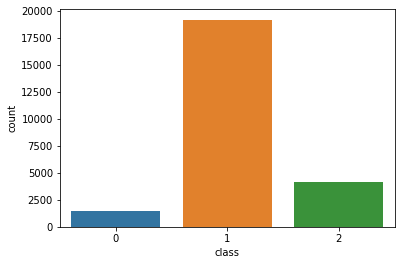

In [5]:
sns.countplot(df['class'])
plt.show()

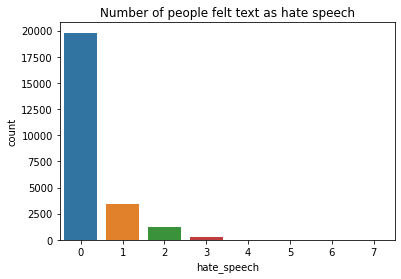

In [6]:
sns.countplot(df['hate_speech'])
plt.title('Number of people felt text as hate speech')
plt.show()

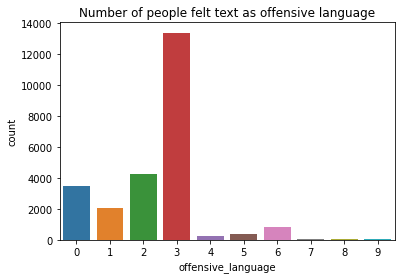

In [7]:
sns.countplot(df['offensive_language'])
plt.title('Number of people felt text as offensive language')
plt.show()

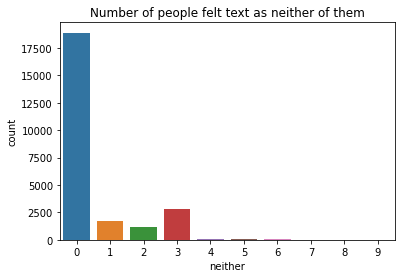

In [8]:
sns.countplot(df['neither'])
plt.title('Number of people felt text as neither of them')
plt.show()

In [9]:
def plot_dist(data):
    
    fig,ax = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(data,ax=ax[0])
    sns.boxplot(data,ax=ax[1])
    plt.show()

In [10]:
# number of words
df['Number of words'] = df['tweet'].apply(lambda x: len(x.split(' ')))

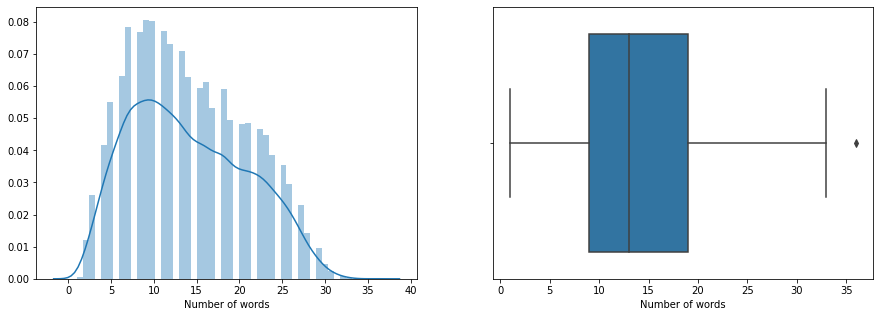

In [11]:
plot_dist(df['Number of words']);

In [12]:
# average word length
df['avg_word_len'] = df['tweet'].apply(lambda x: np.mean([len(c) for c in  x.split(' ')]))

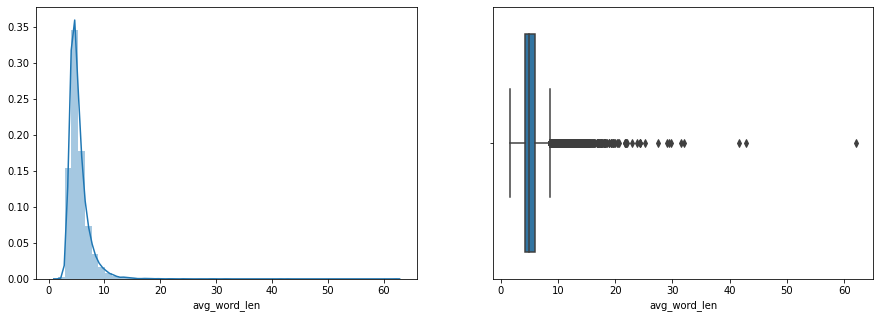

In [13]:
plot_dist(df['avg_word_len']);

In [14]:
# number of stopwords
df['Number of stop words'] = df['tweet'].apply(lambda x: len([c for c in x.split(' ') if c in stopwords]))

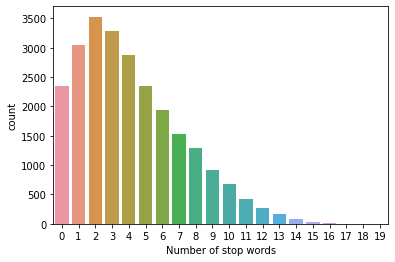

In [15]:
sns.countplot(df['Number of stop words'])
plt.show()

In [16]:
# number of character count
df['Number of char'] = df['tweet'].apply(lambda x: len(x))

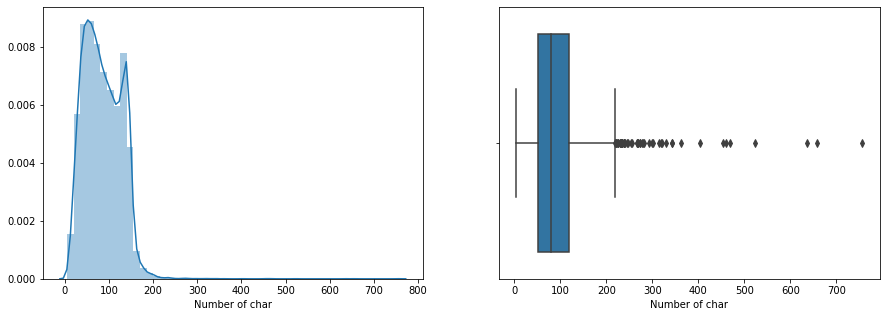

In [17]:
plot_dist(df['Number of char']);

In [18]:
# number of unique
df['Number of unique words'] = df['tweet'].apply(lambda x: len(set(x.split(' '))))

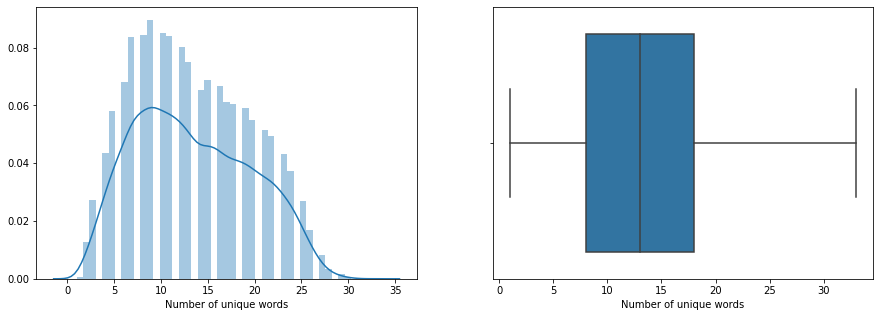

In [19]:
plot_dist(df['Number of unique words']);

In [20]:
# number of urls
df['Number of urls'] = df['tweet'].apply(lambda x: len(re.findall('https?',x)))

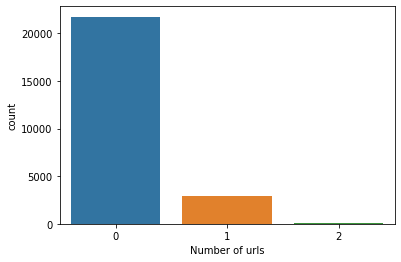

In [21]:
sns.countplot(df['Number of urls'])
plt.show()

In [22]:
# number of emoticons
df['Number of emoticons'] = df['tweet'].apply(lambda x: len(re.findall('&#[0-9]+;',x)))

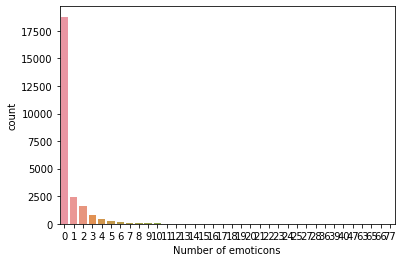

In [23]:
sns.countplot(df['Number of emoticons'])
plt.show()

In [24]:
# number of punctuations
df['Number of punctuations'] = df['tweet'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

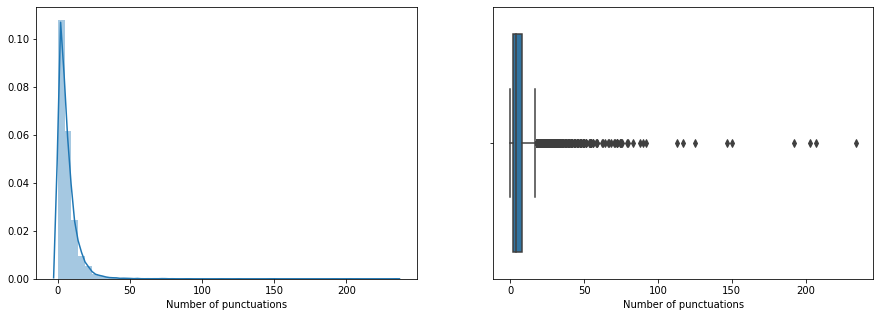

In [25]:
plot_dist(df['Number of punctuations']);

In [26]:
# number of mentions
df['Number of mentions'] = df['tweet'].apply(lambda x: len(re.findall('@',x)))

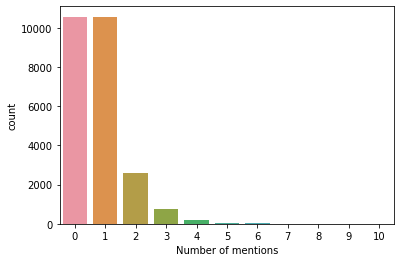

In [27]:
sns.countplot(df['Number of mentions'])
plt.show()

In [28]:
# number of hastags
df['Number of hashtags'] = df['tweet'].apply(lambda x: len(re.findall('#',x)))

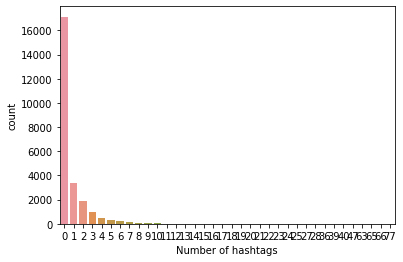

In [29]:
sns.countplot(df['Number of hashtags'])
plt.show()

In [30]:
# df = df[["tweet", "labels"]]
# print(df.head())

In [31]:
# sns.countplot(df['labels'], palette='Set3').set_title('Distribution of Class')

# plt.savefig(r'C:\Users\acer\Desktop\Final Project1\visualizations\orig_class_imbalance.png', bbox_inches = "tight", pad_inches=.5)

In [32]:
# df['label'] = df['class']
df['label'] = df['class'].map({0: "Hate Speech", 
                                    1: "Offensive Language", 
                                    2: "Neither Hate Nor Offensive"})
print(df.head())

   count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  Number of words  \
0  !!! RT @mayasolovely: As a woman you shouldn't...               25   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...               16   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...               21   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...                9   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...               26   

   avg_word_len  Number of stop words  Number of char  Number of unique words  \
0      4.640000                    11             140                      23   
1      4.375000                 

In [33]:
df.label.unique()

array(['Neither Hate Nor Offensive', 'Offensive Language', 'Hate Speech'],
      dtype=object)

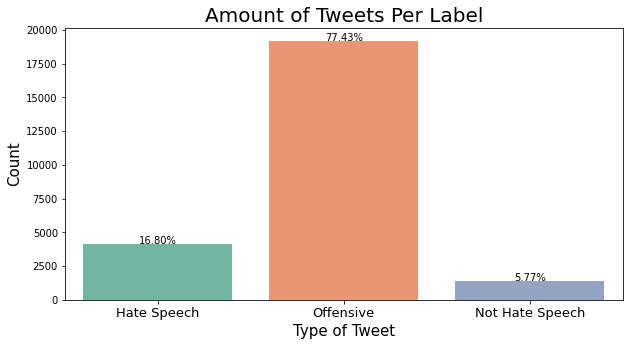

In [34]:
plt.figure(figsize = (10,5))
ax = sns.countplot(df['label'], palette='Set2')

ax.set_title('Amount of Tweets Per Label',fontsize = 20)
ax.set_xlabel('Type of Tweet',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
ax.set_xticklabels(['Hate Speech','Offensive', 'Not Hate Speech'],fontsize = 13)

total = float(len(df)) # one person per row 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total * 100) + '%',
            ha="center") 

plt.savefig(r'C:\Users\acer\Desktop\Final Project1\visualizations\cleaned_class_imbalance.png', bbox_inches = "tight", pad_inches=.5)

In [35]:
raw_df = df.copy()
raw_df.head()

,count,hate_speech,offensive_language,neither,class,tweet,Number of words,avg_word_len,Number of stop words,Number of char,Number of unique words,Number of urls,Number of emoticons,Number of punctuations,Number of mentions,Number of hashtags,label
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,25,4.640000,11,140,23,0,0,12,1,0,Neither Hate Nor Offensive
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,16,4.375000,3,85,16,0,0,12,1,0,Offensive Language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,21,4.761905,6,120,19,0,0,15,2,0,Offensive Language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,9,6.000000,2,62,9,0,0,15,2,0,Offensive Language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,26,4.307692,12,137,23,0,1,18,1,1,Offensive Language


In [36]:
# pickling the raw tweets for later EDA
raw_df.to_pickle(r"C:\Users\acer\Desktop\Final Project1\pickle\raw_tweets_df.pkl")

In [37]:
df = pd.DataFrame(raw_df)
  
# saving the dataframe
df.to_csv(r'C:\Users\acer\Desktop\Final Project1\src\raw_counts.csv', index=False)

# Creating new `clean_df` with renamed columns

In [38]:
stemmer = nltk.SnowballStemmer("english")
# function to clean all data
def clean_text_round1(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

round1 = lambda x: clean_text_round1(x)

In [39]:
# appling data cleaning function to `tweet` column
df['clean_tweets'] = df['tweet'].apply(round1)
clean_tweets = df['clean_tweets'] 
# checking that it worked
df.head(5)

,count,hate_speech,offensive_language,neither,class,tweet,Number of words,avg_word_len,Number of stop words,Number of char,Number of unique words,Number of urls,Number of emoticons,Number of punctuations,Number of mentions,Number of hashtags,label,clean_tweets
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,25,4.640000,11,140,23,0,0,12,1,0,Neither Hate Nor Offensive,rt mayasolov woman shouldnt complain clean ho...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,16,4.375000,3,85,16,0,0,12,1,0,Offensive Language,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,21,4.761905,6,120,19,0,0,15,2,0,Offensive Language,rt urkindofbrand dawg rt ever fuck bitch sta...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,9,6.000000,2,62,9,0,0,15,2,0,Offensive Language,rt cganderson vivabas look like tranni
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,26,4.307692,12,137,23,0,1,18,1,1,Offensive Language,rt shenikarobert shit hear might true might f...


In [40]:
# df_concat = pd.concat([raw_df,clean_tweets], axis=1)
# df_concat.head()

In [41]:
# df = df_concat.copy()
# df.head(3)

In [42]:
df = pd.DataFrame(df)

# saving the dataframe
df.to_csv(r'C:\Users\acer\Desktop\Final Project1\src\round1_clean.csv', index=False)

In [43]:
# checking for missing values
df.isnull().sum()

count                     0
hate_speech               0
offensive_language        0
neither                   0
class                     0
tweet                     0
Number of words           0
avg_word_len              0
Number of stop words      0
Number of char            0
Number of unique words    0
Number of urls            0
Number of emoticons       0
Number of punctuations    0
Number of mentions        0
Number of hashtags        0
label                     0
clean_tweets              0
dtype: int64

# Pickling `clean_df` for later use
If there needs to be further data cleaning or preprocessing, that will be done in other notebooks

In [44]:
df.to_pickle(r"C:\Users\acer\Desktop\Final Project1\pickle\clean_df.pkl")

# Exploratory Data Analysis

In [45]:
# loading in clean_df
df = pd.read_pickle(r"C:\Users\acer\Desktop\Final Project1\pickle\clean_df.pkl")

In [46]:
df.head(10)

,count,hate_speech,offensive_language,neither,class,tweet,Number of words,avg_word_len,Number of stop words,Number of char,Number of unique words,Number of urls,Number of emoticons,Number of punctuations,Number of mentions,Number of hashtags,label,clean_tweets
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,25,4.640000,11,140,23,0,0,12,1,0,Neither Hate Nor Offensive,rt mayasolov woman shouldnt complain clean ho...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,16,4.375000,3,85,16,0,0,12,1,0,Offensive Language,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,21,4.761905,6,120,19,0,0,15,2,0,Offensive Language,rt urkindofbrand dawg rt ever fuck bitch sta...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,9,6.000000,2,62,9,0,0,15,2,0,Offensive Language,rt cganderson vivabas look like tranni
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,26,4.307692,12,137,23,0,1,18,1,1,Offensive Language,rt shenikarobert shit hear might true might f...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",19,7.368421,8,158,19,0,3,36,1,3,Offensive Language,tmadisonx shit blow meclaim faith somebodi sti...
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",20,4.300000,7,105,19,0,0,15,1,0,Offensive Language,brighterday sit hate anoth bitch got much shi...
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,13,6.615385,3,98,13,0,2,15,1,2,Offensive Language,caus im tire big bitch come us skinni
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",13,3.538462,3,58,11,0,0,6,0,0,Offensive Language,amp might get ya bitch back amp that
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",6,8.666667,0,57,6,0,0,6,1,0,Offensive Language,rhythmixx hobbi includ fight mariam\r\rbitch


# Censoring Words

In [47]:
replacements = { 'bitch':'b**ch', 'bitches':'b**ches', 'nigga':'n***a', 'nigger':'ni**er', 'ass':'a**', 'hoe':'h**', 'hoes':'h**s', 'faggot':'fa***t', 'faggots':'fa***ts', 'fuck':'f**k','fucking':'f**king', 'pussy':'p**sy', 'fag':'f**', 'shit':'sh*t' }

for k, v in replacements.items():
    df['clean_tweets'] = df['clean_tweets'].str.replace(k, v)

In [48]:
# checking that worked
df.head(5)

,count,hate_speech,offensive_language,neither,class,tweet,Number of words,avg_word_len,Number of stop words,Number of char,Number of unique words,Number of urls,Number of emoticons,Number of punctuations,Number of mentions,Number of hashtags,label,clean_tweets
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,25,4.640000,11,140,23,0,0,12,1,0,Neither Hate Nor Offensive,rt mayasolov woman shouldnt complain clean ho...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,16,4.375000,3,85,16,0,0,12,1,0,Offensive Language,rt boy dat coldtyga dwn bad cuffin dat h** ...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,21,4.761905,6,120,19,0,0,15,2,0,Offensive Language,rt urkindofbrand dawg rt ever f**k b**ch sta...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,9,6.000000,2,62,9,0,0,15,2,0,Offensive Language,rt cganderson vivabas look like tranni
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,26,4.307692,12,137,23,0,1,18,1,1,Offensive Language,rt shenikarobert sh*t hear might true might f...


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
# NLP libraries
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.naive_bayes import MultinomialNB

# Most Frequent Words for Each Classification

In [50]:
# creating new dfs for each classification
df_freq_hate = df[df['label']=="Hate Speech"]
df_freq_offensive = df[df['label']=="Offensive Language"]
df_freq_neither = df[df['label']=="Neither Hate Nor Offensive"]

In [51]:
# pulling out the text data for cleaned tweets
data_hate = df_freq_hate['clean_tweets']
data_offensive = df_freq_offensive['clean_tweets']
data_neither = df_freq_neither['clean_tweets']

In [52]:
# function to tokenize tweets and remove stop words with NLTK built-in library
stop_words = set(stopwords.words('english'))
def process_tweet(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [53]:
# creating lists for processed hate & not hate data
process_hate = list(map(process_tweet, data_hate))
process_offensive = list(map(process_tweet, data_offensive))
process_neither = list(map(process_tweet, data_neither))

In [54]:
# exact amount of hate speech
total_vocab_hate = set()
for comment in process_hate:
    total_vocab_hate.update(comment)
len(total_vocab_hate)

3763

In [55]:
# exact amount of neither
total_vocab_neither = set()
for comment in process_neither:
    total_vocab_neither.update(comment)
len(total_vocab_neither)

9943

In [56]:
# exact amount of offensive
total_vocab_offensive = set()
for comment in process_offensive:
    total_vocab_offensive.update(comment)
len(total_vocab_offensive)

19237

## Most Common Words in Each Category

In [57]:
flat_hate = [item for sublist in process_hate for item in sublist]
flat_neither = [item for sublist in process_neither for item in sublist]
flat_offensive = [item for sublist in process_offensive for item in sublist]

In [58]:
hate_freq = FreqDist(flat_hate)
offensive_freq = FreqDist(flat_offensive)
neither_freq = FreqDist(flat_neither)

In [59]:
# Top 20 Hate Speech words:
hate_freq.most_common(20)

[('*', 3781),
 ('f', 376),
 ('rt', 324),
 ('b', 273),
 ('ch', 267),
 ('n', 255),
 ('fa', 247),
 ('k', 223),
 ('like', 173),
 ('ni', 169),
 ('er', 167),
 ('white', 128),
 ('trash', 113),
 ('u', 104),
 ('h', 98),
 ('dont', 96),
 ('im', 93),
 ('get', 82),
 ('sh', 69),
 ('hate', 68)]

In [60]:
# Top 20 offensive words:
offensive_freq.most_common(20)

[('*', 49145),
 ('b', 11126),
 ('ch', 10973),
 ('rt', 5943),
 ('h', 4118),
 ('f', 2535),
 ('like', 2356),
 ('n', 2355),
 ('pussi', 2106),
 ('k', 2096),
 ('im', 1752),
 ('dont', 1489),
 ('get', 1478),
 ('got', 1416),
 ('sh', 1312),
 ('aint', 1089),
 ('u', 1059),
 ('lol', 846),
 ('know', 738),
 ('go', 708)]

In [61]:
# Top 20 neither words:
neither_freq.most_common(20)

[('rt', 1311),
 ('trash', 679),
 ('*', 533),
 ('bird', 452),
 ('yanke', 339),
 ('like', 311),
 ('charli', 256),
 ('im', 217),
 ('yellow', 217),
 ('get', 215),
 ('dont', 169),
 ('amp', 166),
 ('one', 147),
 ('make', 142),
 ('lol', 140),
 ('go', 138),
 ('got', 134),
 ('look', 129),
 ('color', 117),
 ('browni', 115)]

## Normalizing Word Frequencies

In [62]:
hate_total_word_count = sum(hate_freq.values())
hate_top_25 = hate_freq.most_common(25)
print("Hate Word \t Normalized Frequency")
print()
for word in hate_top_25:
    normalized_frequency = word[1]/hate_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Hate Word 	 Normalized Frequency

* 		 0.2279
f 		 0.02267
rt 		 0.01953
b 		 0.01646
ch 		 0.0161
n 		 0.01537
fa 		 0.01489
k 		 0.01344
like 		 0.01043
ni 		 0.01019
er 		 0.01007
white 		 0.007716
trash 		 0.006812
u 		 0.00627
h 		 0.005908
dont 		 0.005787
im 		 0.005606
get 		 0.004943
sh 		 0.00416
hate 		 0.004099
retard 		 0.003858
got 		 0.003557
peopl 		 0.003497
look 		 0.003436
pussi 		 0.003135


In [63]:
offensive_word_count = sum(offensive_freq.values())
offensive_top_25 = offensive_freq.most_common(25)
print("Offensive Word \t Normalized Frequency")
print()
for word in offensive_top_25:
    normalized_frequency = word[1]/offensive_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Offensive Word 	 Normalized Frequency

* 		 0.2232
b 		 0.05052
ch 		 0.04983
rt 		 0.02699
h 		 0.0187
f 		 0.01151
like 		 0.0107
n 		 0.01069
pussi 		 0.009563
k 		 0.009518
im 		 0.007956
dont 		 0.006761
get 		 0.006711
got 		 0.00643
sh 		 0.005958
aint 		 0.004945
u 		 0.004809
lol 		 0.003842
know 		 0.003351
go 		 0.003215
amp 		 0.002847
love 		 0.002847
want 		 0.002711
girl 		 0.002702
yall 		 0.002656


In [64]:
neither_word_count = sum(neither_freq.values())
neither_top_25 = neither_freq.most_common(25)
print("Neither Word \t Normalized Frequency")
print()
for word in offensive_top_25:
    normalized_frequency = word[1]/neither_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Neither Word 	 Normalized Frequency

* 		 1.295
b 		 0.2932
ch 		 0.2892
rt 		 0.1566
h 		 0.1085
f 		 0.06681
like 		 0.06209
n 		 0.06206
pussi 		 0.0555
k 		 0.05524
im 		 0.04617
dont 		 0.03924
get 		 0.03895
got 		 0.03732
sh 		 0.03458
aint 		 0.0287
u 		 0.02791
lol 		 0.0223
know 		 0.01945
go 		 0.01866
amp 		 0.01652
love 		 0.01652
want 		 0.01573
girl 		 0.01568
yall 		 0.01542


### Visualizing Top Word Percentages

In [65]:
# create counts of hate and not hate with values and words
hate_bar_counts = [x[1] for x in hate_freq.most_common(20)]
hate_bar_words = [x[0] for x in hate_freq.most_common(20)]

offensive_bar_counts = [x[1] for x in offensive_freq.most_common(20)]
offensive_bar_words = [x[0] for x in offensive_freq.most_common(20)]

neither_bar_counts = [x[1] for x in neither_freq.most_common(20)]
neither_bar_words = [x[0] for x in neither_freq.most_common(20)]

In [66]:
# set the color of the bar graphs
color = cm.magma(np.linspace(.4,.8, 30))

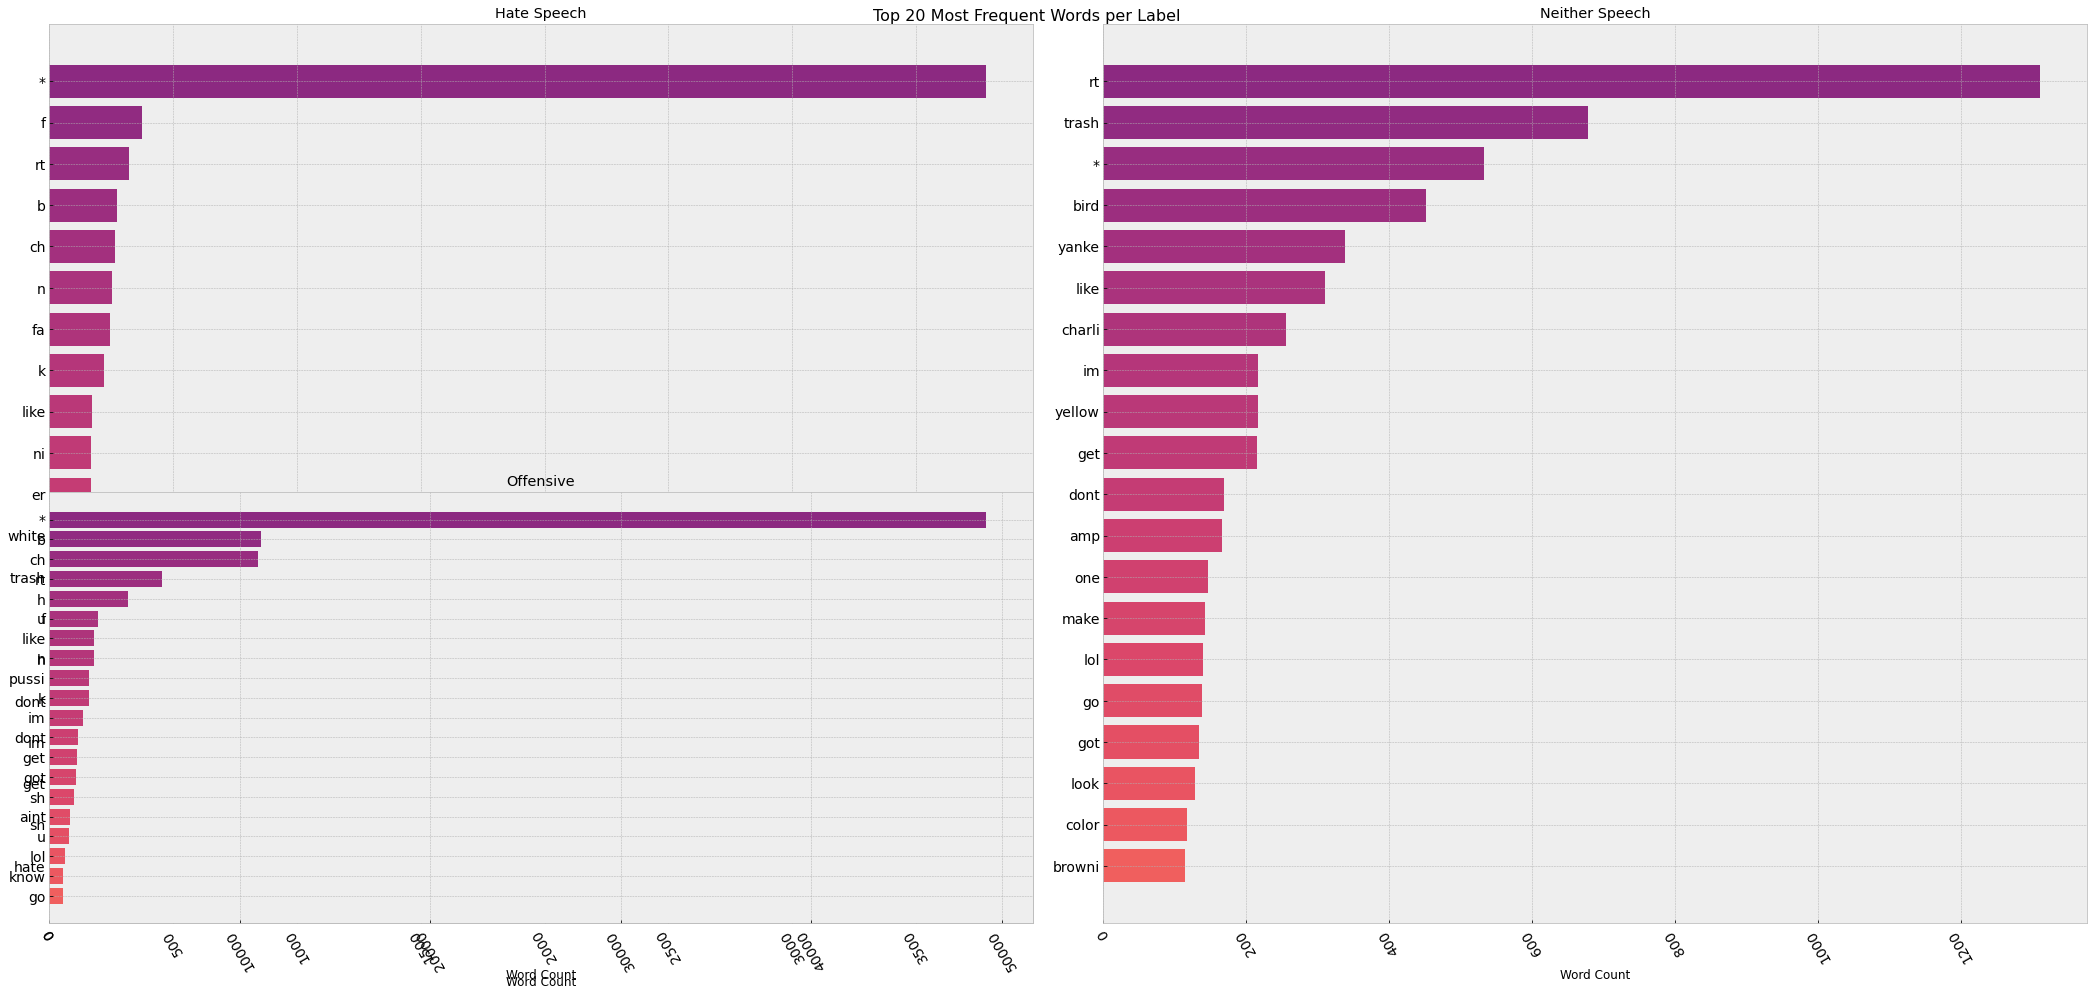

In [67]:
new_figure = plt.figure(figsize=(30, 15))

ax = new_figure.add_subplot(121)
ax.invert_yaxis()

ax2 = new_figure.add_subplot(223)
ax2.invert_yaxis()

ax3 = new_figure.add_subplot(122)
ax3.invert_yaxis()

# generating a bar chart on each axes
ax.barh(hate_bar_words, hate_bar_counts, color=color)
ax2.barh(offensive_bar_words, offensive_bar_counts, color=color)
ax3.barh(neither_bar_words, neither_bar_counts, color=color)


ax.title.set_text('Hate Speech')
ax2.title.set_text('Offensive')
ax3.title.set_text('Neither Speech')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=120, fontsize=14)
    plt.xlabel("Word Count")
    plt.yticks(fontsize=14)
plt.tight_layout(pad=2)

new_figure.suptitle('Top 20 Most Frequent Words per Label', fontsize=16)

plt.savefig(r'C:\Users\acer\Desktop\Final Project1\visualizations\label_word_count_y.png',facecolor='w', pad_inches=2)
plt.show()

# What Words are Only in Hate Speech?

The purpose of this is to check whether the words unique to the "Hate Speech" label are threatening or especially derogatory.

In [68]:
def returnNotMatches(a, b, c):
    return [x for x in a if x not in [b,c]]

In [69]:
returnNotMatches(flat_hate, flat_neither,flat_offensive)

['whalelookyher',
 'queer',
 'gaywad',
 'whitethunduh',
 'alsarabsss',
 'hes',
 'beaner',
 'smh',
 'tell',
 'hes',
 'mexican',
 'devilgrimz',
 'vigxrart',
 'f',
 '*',
 '*',
 'k',
 'gay',
 'blacklist',
 'h',
 '*',
 '*',
 'hold',
 'tehgodclan',
 'anyway',
 'markroundtreejr',
 'lmfaoooo',
 'hate',
 'black',
 'peopl',
 'black',
 'peopl',
 'ni',
 '*',
 '*',
 'er',
 'nochillpaz',
 'least',
 'im',
 'ni',
 '*',
 '*',
 'er',
 'lmfao',
 'whiteponyjr',
 'ariza',
 'snake',
 'coward',
 'least',
 'isnt',
 'crippl',
 'like',
 'hero',
 'roach',
 'lmaoo',
 'rtnba',
 'drake',
 'new',
 'sh',
 '*',
 '*',
 'releas',
 'nikejordan',
 'yes',
 'glitter',
 'sh',
 '*',
 '*',
 'dude',
 'f',
 '*',
 '*',
 'theomaxximus',
 'gerryshalloweenparti',
 'halloween',
 'yesterday',
 'stupid',
 'ni',
 '*',
 '*',
 'er',
 'ashlingwild',
 'itsnotadam',
 'bore',
 'suppos',
 'cute',
 'fa',
 '*',
 '*',
 '*',
 'sometim',
 'bigbootybishopp',
 'whitethunduh',
 'la',
 '*',
 '*',
 'en',
 'cc',
 'coach',
 'want',
 'feel',
 'youll',
 'ge

In [70]:
def returnNotMatches(a, b, c):
    return [x for x in b if x not in [a,c]]

In [71]:
returnNotMatches(flat_hate, flat_neither,flat_offensive)

['rt',
 'mayasolov',
 'woman',
 'shouldnt',
 'complain',
 'clean',
 'hous',
 'amp',
 'man',
 'alway',
 'take',
 'trash',
 'momma',
 'said',
 'pussi',
 'cat',
 'insid',
 'doghous',
 'simplyaddictedtoguy',
 'woof',
 'woof',
 'hot',
 'scalli',
 'lad',
 'allaboutmanfeet',
 'woof',
 'woof',
 'hot',
 'sole',
 'allyhaaaaa',
 'lemmi',
 'eat',
 'oreo',
 'amp',
 'dish',
 'one',
 'oreo',
 'lol',
 'eggplant',
 'emoji',
 'doey',
 'say',
 'look',
 'like',
 'scream',
 'lmao',
 'babyanimalp',
 'babi',
 'monkey',
 'bathtim',
 'awwww',
 'soooo',
 'ador',
 'domworldpeac',
 'basebal',
 'season',
 'win',
 'yanke',
 'love',
 'start',
 'dunderbail',
 'im',
 'earli',
 'bird',
 'im',
 'night',
 'owl',
 'im',
 'wise',
 'worm',
 'edgarpixar',
 'overdos',
 'heavi',
 'drug',
 'doesnt',
 'sound',
 'bad',
 'tonight',
 'pussi',
 'sh',
 '*',
 'everi',
 'day',
 'pit',
 'bull',
 'photograph',
 'love',
 'fairi',
 'tale',
 'creatur',
 'fairi',
 'tale',
 'creatur',
 'long',
 'laker',
 'trash',
 'could',
 'careless',
 'real

In [72]:
def returnNotMatches(a, b, c):
    return [x for x in c if x not in [a,b]]
returnNotMatches(flat_hate, flat_neither,flat_offensive)

['rt',
 'boy',
 'dat',
 'coldtyga',
 'dwn',
 'bad',
 'cuffin',
 'dat',
 'h',
 '*',
 '*',
 'place',
 'rt',
 'urkindofbrand',
 'dawg',
 'rt',
 'ever',
 'f',
 '*',
 '*',
 'k',
 'b',
 '*',
 '*',
 'ch',
 'start',
 'cri',
 'confus',
 'sh',
 '*',
 'rt',
 'cganderson',
 'vivabas',
 'look',
 'like',
 'tranni',
 'rt',
 'shenikarobert',
 'sh',
 '*',
 'hear',
 'might',
 'true',
 'might',
 'faker',
 'b',
 '*',
 '*',
 'ch',
 'told',
 'ya',
 'tmadisonx',
 'sh',
 '*',
 'blow',
 'meclaim',
 'faith',
 'somebodi',
 'still',
 'f',
 '*',
 '*',
 'k',
 'h',
 '*',
 '*',
 'brighterday',
 'sit',
 'hate',
 'anoth',
 'b',
 '*',
 '*',
 'ch',
 'got',
 'much',
 'sh',
 '*',
 'go',
 'caus',
 'im',
 'tire',
 'big',
 'b',
 '*',
 '*',
 'ch',
 'come',
 'us',
 'skinni',
 'amp',
 'might',
 'get',
 'ya',
 'b',
 '*',
 '*',
 'ch',
 'back',
 'amp',
 'rhythmixx',
 'hobbi',
 'includ',
 'fight',
 'mariam',
 'b',
 '*',
 '*',
 'ch',
 'keek',
 'b',
 '*',
 '*',
 'ch',
 'curv',
 'everyon',
 'lol',
 'walk',
 'convers',
 'like',
 'smh',


## Visualizing Unique Words with Venn Diagram

In [73]:
import matplotlib_venn as venn
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles
import matplotlib.pyplot as plt

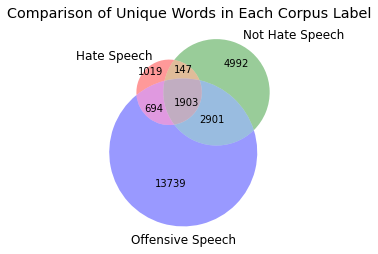

In [74]:
venn3([set(flat_hate), set(flat_neither), set(flat_offensive)], set_labels = ('Hate Speech', 'Not Hate Speech','Offensive Speech'))
plt.title('Comparison of Unique Words in Each Corpus Label')
plt.savefig(r'C:\Users\acer\Desktop\Final Project1\visualizations\word_venn.png', bbox_inches = "tight", pad_inches=.5, facecolor='w')

# Preprocessing Text Data

The purpose of this notebook is to conduct the preprocessing steps that are necessary for text data in NLP. This includes tokenizing, removing stop words, vectorizing, etc.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
%matplotlib inline
# packages for NLP preprocessing
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.collocations import *
import pickle

# Loading in the clean dataframe from `data_cleaning.ipynb`

In [76]:
# this is our corpus
clean_df = pd.read_pickle(r'C:\Users\acer\Desktop\Final Project1\pickle\clean_df.pkl')
clean_df.head()

,count,hate_speech,offensive_language,neither,class,tweet,Number of words,avg_word_len,Number of stop words,Number of char,Number of unique words,Number of urls,Number of emoticons,Number of punctuations,Number of mentions,Number of hashtags,label,clean_tweets
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,25,4.640000,11,140,23,0,0,12,1,0,Neither Hate Nor Offensive,rt mayasolov woman shouldnt complain clean ho...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,16,4.375000,3,85,16,0,0,12,1,0,Offensive Language,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,21,4.761905,6,120,19,0,0,15,2,0,Offensive Language,rt urkindofbrand dawg rt ever fuck bitch sta...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,9,6.000000,2,62,9,0,0,15,2,0,Offensive Language,rt cganderson vivabas look like tranni
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,26,4.307692,12,137,23,0,1,18,1,1,Offensive Language,rt shenikarobert shit hear might true might f...


# Creating `tweet_df` with only cleaned tweets column

In [77]:
tweet_df = clean_df[['clean_tweets', 'label']].copy()

In [78]:
tweet_df.head()

,clean_tweets,label
0,rt mayasolov woman shouldnt complain clean ho...,Neither Hate Nor Offensive
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,Offensive Language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,Offensive Language
3,rt cganderson vivabas look like tranni,Offensive Language
4,rt shenikarobert shit hear might true might f...,Offensive Language


In [79]:
data = tweet_df['clean_tweets']
target = tweet_df['label']

# Tokenizing Before Removing Stop Words

When working with text data, one of the first steps is to remove stop words from the corpus. Although text would be gramatically incorrect without these stop words, they provide little value to models and typically hinder performace.

Before removing stop words, let's take a look at the top words in this corpus.

In [80]:
# function to tokenize without removing stop words
def unfiltered_tokens(text):
    dirty_tokens = nltk.word_tokenize(text)
    return dirty_tokens

In [81]:
# applying this function to the `clean_tweets` column
unfilterd_data = list(map(unfiltered_tokens, data))

In [82]:
# morphing `unfiltered_data` into a readable list
flat_unfiltered = [item for sublist in unfilterd_data for item in sublist]

In [83]:
# getting frequency distribution
dirty_corpus_freqdist = FreqDist(flat_unfiltered)
# top 20 words in the corpus
dirty_corpus_freqdist.most_common(20)

[('bitch', 11169),
 ('rt', 7578),
 ('hoe', 4184),
 ('like', 2840),
 ('fuck', 2233),
 ('pussi', 2165),
 ('im', 2062),
 ('nigga', 1976),
 ('get', 1775),
 ('dont', 1752),
 ('got', 1609),
 ('ass', 1579),
 ('shit', 1278),
 ('u', 1272),
 ('aint', 1157),
 ('trash', 1133),
 ('lol', 1033),
 ('go', 897),
 ('know', 878),
 ('amp', 840)]

We can see that stop words typically dominate the top spots. Such as 'a', 'i', 'the', 'to', etc. But this tells us nothing about the actual content of the corpus, and will negatively impact model performance.

Let's actually remove the stop words now.

# Removing Stop Words in Tokenization
We can use NLTK's built-in library of stop words to remove them in a tokenizing function.

In [84]:
stop_words = set(stopwords.words('english'))

In [85]:
def process_tweet(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [86]:
# applying the above function to our data/features 
processed_data = list(map(process_tweet, data))

In [87]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

25477

Here we can see that our corpus has a vocabulary of 25477. This would also be the number of columns in the sparse matrix after we vectorize the data later.

Now that the stop words are removed and the corpus is tokenized, let's take a look at the top words in this corpus.

In [88]:
# morphing `processed_data` into a readable list
flat_filtered = [item for sublist in processed_data for item in sublist]
# getting frequency distribution
clean_corpus_freqdist = FreqDist(flat_filtered)
# top 20 words in cleaned corpus
clean_corpus_freqdist.most_common(20)

[('bitch', 11169),
 ('rt', 7578),
 ('hoe', 4184),
 ('like', 2840),
 ('fuck', 2233),
 ('pussi', 2165),
 ('im', 2062),
 ('nigga', 1976),
 ('get', 1775),
 ('dont', 1752),
 ('got', 1609),
 ('ass', 1579),
 ('shit', 1278),
 ('u', 1272),
 ('aint', 1157),
 ('trash', 1133),
 ('lol', 1033),
 ('go', 897),
 ('know', 878),
 ('amp', 840)]

# Lemmatization

This last method reduces each word into a linguistically valid **lemma**, or root word. It does this through linguistic mappings, using the WordNet lexical database.


In [89]:
# creating a list with all lemmatized outputs
lemmatizer = WordNetLemmatizer() 
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [90]:
X_lem = lemmatized_output
y_lem = target

In [91]:
# pickle these for modeling
pickle_out = open(r'C:\Users\acer\Desktop\Final Project1\pickle\X_lem.pkl','wb')
pickle.dump(X_lem, pickle_out)
pickle_out.close()

In [92]:
# pickle these for modeling
pickle_out = open(r'C:\Users\acer\Desktop\Final Project1\pickle\y_lem.pkl','wb')
pickle.dump(y_lem, pickle_out)
pickle_out.close()

In [93]:
y_lem.to_pickle(r'C:\Users\acer\Desktop\Final Project1\pickle\y_lem.pkl')

## Additional Corpus EDA - Creating Bigrams

Knowing individual word frequencies is somewhat informative, but in practice, some of these tokens are actually parts of larger phrases that should be treated as a single unit. Let's create some bigrams, and see which combinations of words are most telling.

In [94]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [95]:
# creating a finder & passing in tokenized corpus
bigram_finder = BigramCollocationFinder.from_words(flat_filtered)

In [96]:
# computing bigram scores
corpus_scored = bigram_finder.score_ngrams(bigram_measures.raw_freq)

In [97]:
# top 20 bigrams
corpus_scored[:20]

[(('bitch', 'rt'), 0.0036468570547654837),
 (('hoe', 'rt'), 0.0017535745943654372),
 (('wan', 'na'), 0.0016427718040621267),
 (('bad', 'bitch'), 0.0015416040390025822),
 (('got', 'ta'), 0.0014886114001618684),
 (('look', 'like'), 0.0014837938875399853),
 (('gon', 'na'), 0.0014115311982117393),
 (('fuck', 'bitch'), 0.001242918256445832),
 (('like', 'bitch'), 0.001242918256445832),
 (('bitch', 'ass'), 0.0012043781554707674),
 (('ass', 'bitch'), 0.0011947431302270011),
 (('bitch', 'im'), 0.0010983928777893398),
 (('bitch', 'dont'), 0.0010646702894361584),
 (('bitch', 'like'), 0.0009779550622422632),
 (('yo', 'bitch'), 0.0009201449107796662),
 (('ass', 'nigga'), 0.0008575172466951863),
 (('bitch', 'aint'), 0.0007900720699888234),
 (('bitch', 'get'), 0.0007708020195012911),
 (('bitch', 'got'), 0.0007659845068794081),
 (('bitch', 'nigga'), 0.0007370794311481096)]

# Calculating Mutual Information Scores

Pointwise Mutual Information Score is a statistical measure from information theory that generally measures the mutual dependence between two words. In plain english, this measures how much information the bigram itself contains by computing the dependence between the two words in the bigram. 


In [98]:
# creating a finder for pmi & passing in torkenized corpus
pmi_finder = BigramCollocationFinder.from_words(flat_filtered)

In [99]:
# applying frequency filter that only examines bigrams that occur more than 5 times
pmi_finder.apply_freq_filter(5)

In [100]:
# using finder to calculate pmi scores
pmi_scored = pmi_finder.score_ngrams(bigram_measures.pmi)

In [101]:
# first 30 elements in this list
pmi_scored[:30]

[(('wishi', 'washi'), 15.078317622216062),
 (('disrupt', 'shylock'), 14.66328012293722),
 (('oper', 'disrupt'), 14.66328012293722),
 (('spear', 'chucker'), 14.66328012293722),
 (('aux', 'cord'), 14.663280122937218),
 (('trey', 'songz'), 14.663280122937218),
 (('kevin', 'hart'), 14.341352028049855),
 (('cargo', 'haircut'), 14.230320715661113),
 (('sweetest', 'joy'), 14.078317622216062),
 (('resist', 'urg'), 13.981456082963472),
 (('cantucimblond', 'kacado'), 13.914341887104937),
 (('softestmuffin', 'torahblaz'), 13.908392620773752),
 (('revkahjc', 'cantucimblond'), 13.88192040941256),
 (('colour', 'cargo'), 13.81528321638227),
 (('khaki', 'colour'), 13.81528321638227),
 (('chief', 'keef'), 13.699805998962333),
 (('reveng', 'sweetest'), 13.645358214939957),
 (('uncleunco', 'bobbybotsod'), 13.645358214939957),
 (('justin', 'bieber'), 13.533997105992253),
 (('bobbybotsod', 'fuckthemallcop'), 13.493355121494906),
 (('miley', 'cyrus'), 13.438313757936946),
 (('sloppi', 'toppi'), 13.341352028

In [102]:
bigrams_list = pmi_scored[:30]

In [103]:
bigrams_list

[(('wishi', 'washi'), 15.078317622216062),
 (('disrupt', 'shylock'), 14.66328012293722),
 (('oper', 'disrupt'), 14.66328012293722),
 (('spear', 'chucker'), 14.66328012293722),
 (('aux', 'cord'), 14.663280122937218),
 (('trey', 'songz'), 14.663280122937218),
 (('kevin', 'hart'), 14.341352028049855),
 (('cargo', 'haircut'), 14.230320715661113),
 (('sweetest', 'joy'), 14.078317622216062),
 (('resist', 'urg'), 13.981456082963472),
 (('cantucimblond', 'kacado'), 13.914341887104937),
 (('softestmuffin', 'torahblaz'), 13.908392620773752),
 (('revkahjc', 'cantucimblond'), 13.88192040941256),
 (('colour', 'cargo'), 13.81528321638227),
 (('khaki', 'colour'), 13.81528321638227),
 (('chief', 'keef'), 13.699805998962333),
 (('reveng', 'sweetest'), 13.645358214939957),
 (('uncleunco', 'bobbybotsod'), 13.645358214939957),
 (('justin', 'bieber'), 13.533997105992253),
 (('bobbybotsod', 'fuckthemallcop'), 13.493355121494906),
 (('miley', 'cyrus'), 13.438313757936946),
 (('sloppi', 'toppi'), 13.341352028

## Visualizing Bigram Frequency

In [104]:
bigrams_series = (pd.Series(nltk.ngrams(flat_filtered, 2)).value_counts())[:20]

Text(0.5, 0, 'Number of Occurances')

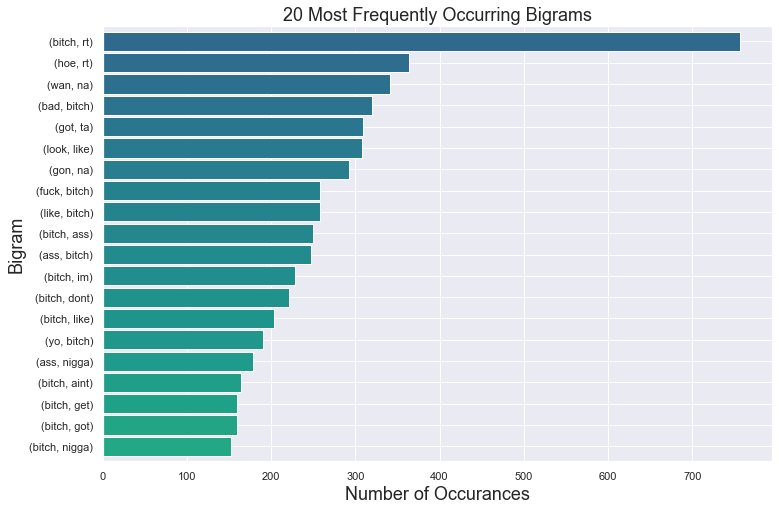

In [105]:
bigrams_series.sort_values().plot.barh(color=cm.viridis_r(np.linspace(.4,.8, 30)), width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occurring Bigrams', fontsize=18)
plt.ylabel('Bigram', fontsize=18)
plt.xlabel('Number of Occurances', fontsize=18)

# Converting list to DF we can censor the bigrams

In [106]:
bigrams_df = pd.DataFrame(bigrams_list,columns=['bigram', 'pmi_score'])

In [107]:
bigrams_df.head()

,bigram,pmi_score
0,"(wishi, washi)",15.078318
1,"(disrupt, shylock)",14.663280
2,"(oper, disrupt)",14.663280
3,"(spear, chucker)",14.663280
4,"(aux, cord)",14.663280


# Sentiment Analysis with VADER

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 

It uses a [sentiment lexicon](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt), which is a list of lexical features (e.g., slang words). These are generally labeled according to their semantic orientation as either positive or negative.

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
# pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [109]:
analyser = SentimentIntensityAnalyzer()

In [110]:
clean_df = pd.read_pickle(r'C:\Users\acer\Desktop\Final Project1\pickle\clean_df.pkl')

In [111]:
# function to calculate polarity scores
pol = lambda x: analyser.polarity_scores(x)

In [112]:
# creating new column 'polarity' in clean_df
clean_df['polarity'] = clean_df['clean_tweets'].apply(pol)

In [113]:
# checking that worked
clean_df.head(10)

,count,hate_speech,offensive_language,neither,class,tweet,Number of words,avg_word_len,Number of stop words,Number of char,Number of unique words,Number of urls,Number of emoticons,Number of punctuations,Number of mentions,Number of hashtags,label,clean_tweets,polarity
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,25,4.640000,11,140,23,0,0,12,1,0,Neither Hate Nor Offensive,rt mayasolov woman shouldnt complain clean ho...,"{'neg': 0.157, 'neu': 0.696, 'pos': 0.147, 'co..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,16,4.375000,3,85,16,0,0,12,1,0,Offensive Language,rt boy dat coldtyga dwn bad cuffin dat hoe ...,"{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compou..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,21,4.761905,6,120,19,0,0,15,2,0,Offensive Language,rt urkindofbrand dawg rt ever fuck bitch sta...,"{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'comp..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,9,6.000000,2,62,9,0,0,15,2,0,Offensive Language,rt cganderson vivabas look like tranni,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp..."
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,26,4.307692,12,137,23,0,1,18,1,1,Offensive Language,rt shenikarobert shit hear might true might f...,"{'neg': 0.407, 'neu': 0.44, 'pos': 0.154, 'com..."
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",19,7.368421,8,158,19,0,3,36,1,3,Offensive Language,tmadisonx shit blow meclaim faith somebodi sti...,"{'neg': 0.447, 'neu': 0.377, 'pos': 0.176, 'co..."
6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",20,4.300000,7,105,19,0,0,15,1,0,Offensive Language,brighterday sit hate anoth bitch got much shi...,"{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'comp..."
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,13,6.615385,3,98,13,0,2,15,1,2,Offensive Language,caus im tire big bitch come us skinni,"{'neg': 0.352, 'neu': 0.648, 'pos': 0.0, 'comp..."
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",13,3.538462,3,58,11,0,0,6,0,0,Offensive Language,amp might get ya bitch back amp that,"{'neg': 0.352, 'neu': 0.648, 'pos': 0.0, 'comp..."
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",6,8.666667,0,57,6,0,0,6,1,0,Offensive Language,rhythmixx hobbi includ fight mariam\r\rbitch,"{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'comp..."


# Parsing Out Polarity Score

In [114]:
# dropping unessential columns
# and seperating out 'polarity' dictionary
df = pd.concat([clean_df.drop(['count', 'hate_speech','offensive_language', 'neither', 'tweet', 'polarity','Number of words','avg_word_len', 'Number of urls', 'Number of emoticons', 'Number of punctuations','Number of stop words','Number of char', 'Number of unique words','Number of mentions','Number of hashtags' ], axis=1), clean_df['polarity'].apply(pd.Series)], axis=1)

In [115]:
df.head()

,class,label,clean_tweets,neg,neu,pos,compound
0,2,Neither Hate Nor Offensive,rt mayasolov woman shouldnt complain clean ho...,0.157,0.696,0.147,-0.0382
1,1,Offensive Language,rt boy dat coldtyga dwn bad cuffin dat hoe ...,0.280,0.720,0.000,-0.5423
2,1,Offensive Language,rt urkindofbrand dawg rt ever fuck bitch sta...,0.577,0.423,0.000,-0.8979
3,1,Offensive Language,rt cganderson vivabas look like tranni,0.000,0.667,0.333,0.3612
4,1,Offensive Language,rt shenikarobert shit hear might true might f...,0.407,0.440,0.154,-0.6808


# Average Polarity Scores for Each Label

In [116]:
# new dataframe with average polarity score for each label
scores_df = df.groupby('class')['pos'].mean().reset_index(name='avg_positive')
scores_df['avg_neutral'] = df.groupby('class')['neu'].mean()
scores_df['avg_negative'] = df.groupby('class')['neg'].mean()
scores_df['avg_compound'] = df.groupby('class')['compound'].mean()


In [117]:
scores_df.head()

,class,avg_positive,avg_neutral,avg_negative,avg_compound
0,0,0.096022,0.542441,0.360847,-0.383072
1,1,0.116043,0.554612,0.329239,-0.321658
2,2,0.126629,0.794063,0.079067,0.067400


# Interpreting Polarity Scores

The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories.

- Hate Speech tweets on average are 9% positive, 54% neutral, and 36% negative.
- Offensive twwets on average are 11% positive, 55% neutral, and 32% negative.
- Neither tweets on average are 12% positive, 79% neutral, and 6% negative.

Although these are slightly similar scores, we can see that tweets with Hate Speech have more negativity overall. It makes sense that Non Hate Speech would also be negative, because that category contains offensive language regardless of classifciation. 

It's interesting that a majority of tweets in both classes were deemed neutral. 

The Compound score is a metric that calculates the sum of all the [lexicon ratings](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt) which have been normalized between -1 and +1. With -1 being extreme negative and +1 being extreme positive.

- Hate Speech tweets on average have a compound score of -0.363
- Non Hate Speech tweets on average have a compound score of -0.263

According to this metric, both classes of tweets have negative sentiments because their normalized compound scores are less than -0.05.

This score seems to be the more reliable metric because it encompasses the overall sentiment of this corpus. Both classes contain negative, offensive language. But tweets that have been classified as Hate Speech are especially negative.

# Visualizing Distribution of Each Score

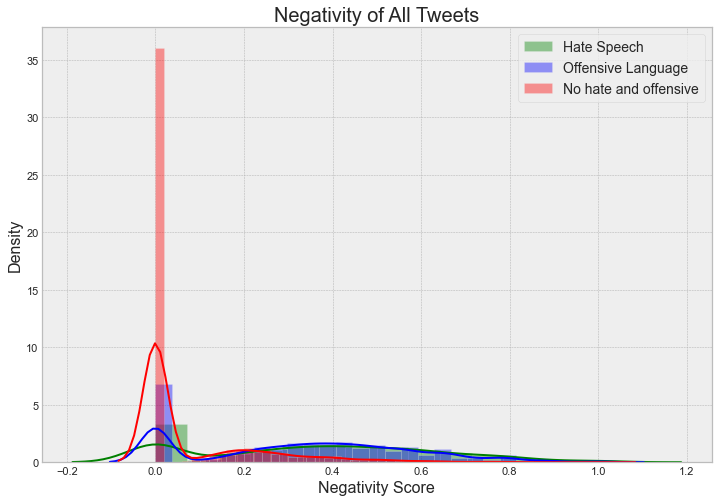

In [118]:
# creating dnsity plot for each label's polarity scores
plt.figure(figsize=(12, 8))
ax = sns.distplot(df['neg'][clean_df['class'] == 0], label='Hate Speech', color='green')
ax = sns.distplot(df['neg'][clean_df['class'] == 1], label='Offensive Language', color='blue')
ax = sns.distplot(df['neg'][clean_df['class'] == 2], label='No hate and offensive', color='red')
# setting label, title and legend
ax.set_title('Negativity of All Tweets', fontsize=20)
ax.set_ylabel('Density', fontsize=16)
ax.set_xlabel('Negativity Score', fontsize=16)
ax.legend(prop=dict(size=14))

plt.savefig(r'C:\Users\acer\Desktop\Final Project1\visualizations\negativity_scores.png', bbox_inches = "tight", facecolor='w', pad_inches=.5)

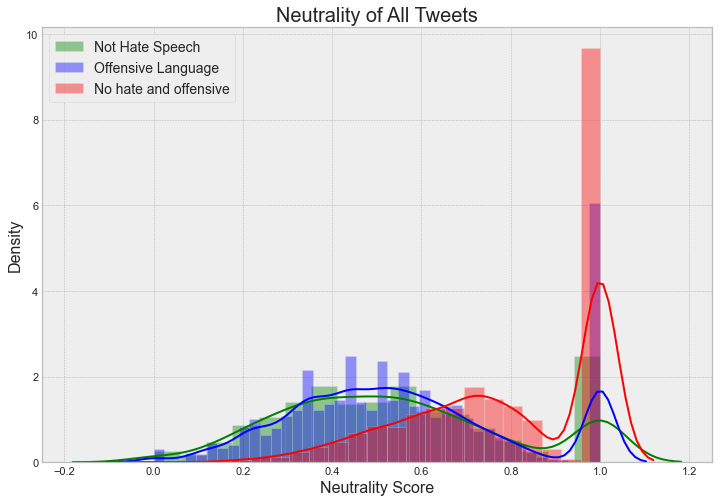

In [119]:
# creating dnsity plot for each label's polarity scores
plt.figure(figsize=(12, 8))
ax = sns.distplot(df['neu'][clean_df['class'] == 0], label='Not Hate Speech', color='green')
ax = sns.distplot(df['neu'][clean_df['class'] == 1], label='Offensive Language', color='blue')
ax = sns.distplot(df['neu'][clean_df['class'] == 2], label='No hate and offensive', color='red')
# setting label, title and legend
ax.set_title('Neutrality of All Tweets', fontsize=20)
ax.set_ylabel('Density', fontsize=16)
ax.set_xlabel('Neutrality Score', fontsize=16)
ax.legend(prop=dict(size=14))

plt.savefig(r'C:\Users\acer\Desktop\Final Project\visualizations\neutrality_scores.png',facecolor='w', bbox_inches = "tight", pad_inches=.5)

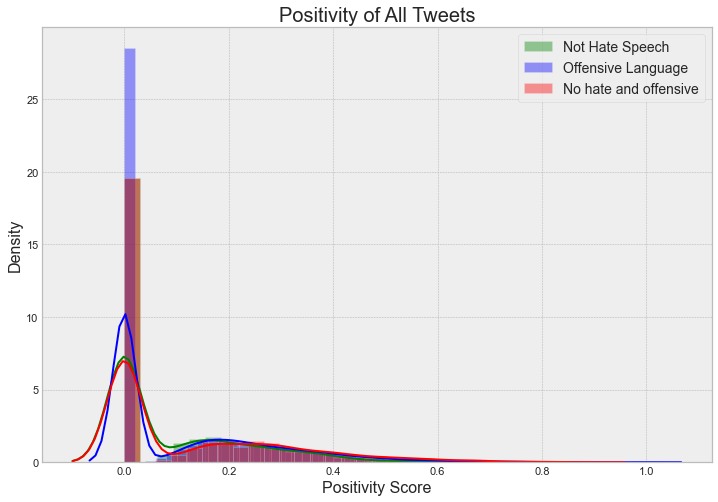

In [120]:
# creating dnsity plot for each label's polarity scores
plt.figure(figsize=(12, 8))
ax = sns.distplot(df['pos'][clean_df['class'] == 0], label='Not Hate Speech', color='green')
ax = sns.distplot(df['pos'][clean_df['class'] == 1], label='Offensive Language', color='blue')
ax = sns.distplot(df['pos'][clean_df['class'] == 2], label='No hate and offensive', color='red')
# setting label, title and legend
ax.set_title('Positivity of All Tweets', fontsize=20)
ax.set_ylabel('Density', fontsize=16)
ax.set_xlabel('Positivity Score', fontsize=16)
ax.legend(prop=dict(size=14))

plt.savefig((r'C:\Users\acer\Desktop\Final Project\visualizations\positivity_scores.png'),facecolor='w', bbox_inches = "tight", pad_inches=.5)

# Bar Chart of Sentiment Scores by Tweet Type

In [121]:
# function to add percentage above each polarity score
def autolabel(rects):
    """Add a text label above bars to display its perentage of data."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3}'.format(height * 100) + '%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

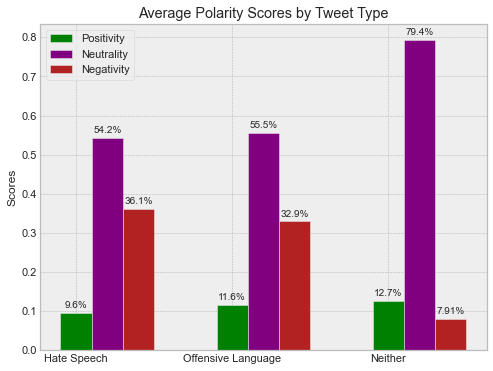

In [122]:
# setting labls and average scores
labels = ['Hate Speech', 'Offensive Language','Neither']
all_positivity = df['pos'].groupby(df['class']).mean()
all_neutrality = df['neu'].groupby(df['class']).mean()
all_negativity = df['neg'].groupby(df['class']).mean()

# set width of bars
width = 0.2  # the width of the bars
# set position of bar on x-axis
x = np.arange(len(labels))
r1 = x
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

# graph figure
fig, ax = plt.subplots(figsize=(8, 6))
# 3 types of grouped bar graphs
ax1 = ax.bar(r1, all_positivity, width, label='Positivity', color='green')
ax2 = ax.bar(r2, all_neutrality, width, label='Neutrality', color='purple')
ax3 = ax.bar(r3, all_negativity, width, label='Negativity', color='firebrick')


# applying percentage display function
autolabel(ax1)
autolabel(ax2)
autolabel(ax3)

# setting axis labels, title and legend location
ax.set_ylabel('Scores')
ax.set_title('Average Polarity Scores by Tweet Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.savefig(r'C:\Users\acer\Desktop\Final Project1\visualizations\avg_polarity_by_tweet_type.png', bbox_inches = "tight", pad_inches=.5)

# Baseline Model

This notebook contains three baseline models: Random Forest,SVM and Naive Bayes. 

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
%matplotlib inline
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, model_selection, svm
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, classification_report
import pickle

# Importing X and y lem

In [124]:
X_lem = pickle.load(open(r'C:\Users\acer\Desktop\Final Project1\pickle\X_lem.pkl', 'rb'))
y_lem = pd.read_pickle(r'C:\Users\acer\Desktop\Final Project1\pickle\y_lem.pkl')

In [125]:
# setting up stop words
stop_words = set(stopwords.words('english'))

# Train-Test Split & Vectorize

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=50)

# using tf_idf vectorizor
tfidf = TfidfVectorizer(stop_words= stop_words, ngram_range=(1,2))

In [127]:
# sparse matrix format with 265K stored elements
tfidf_data_train = tfidf.fit_transform(X_train)
tfidf_data_test = tfidf.transform(X_test)

In [128]:
## pickling X_train for future use
pickle_out = open(r'C:\Users\acer\Desktop\Final Project1\pickle\X_train.pkl',"wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

In [129]:
## pickling tfidf_data_train for future use
pickle_out = open(r'C:\Users\acer\Desktop\Final Project1\pickle\tfidf_data_train.pkl',"wb")
pickle.dump(tfidf_data_train, pickle_out)
pickle_out.close()

In [130]:
# taking a quick look of the non zero elements
non_zero_cols = tfidf_data_train.nnz / float(tfidf_data_train.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train.shape[1]))
print('Percentage of columns containing ZERO: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 15.099515787349944
Percentage of columns containing ZERO: 0.9998777891610293


## Baseline Random Forest

In [131]:
rf_baseline = RandomForestClassifier(n_estimators=100,  random_state=0)
# adding class_weight='balanced' increased accuracy & precision but decreased F1

In [132]:
%%time
rf_baseline.fit(tfidf_data_train, y_train)
rf_test_preds = rf_baseline.predict(tfidf_data_test)

Wall time: 34.7 s


In [133]:
rf_accuracy = accuracy_score(y_test, rf_test_preds)
rf_precision = precision_score(y_test, rf_test_preds, average='weighted')
rf_recall = recall_score(y_test, rf_test_preds, average='weighted')
rf_f1_score = f1_score(y_test, rf_test_preds,average='weighted')
rf_f1_weighted = f1_score(y_test, rf_test_preds, average='weighted')

In [134]:
# printing evaluation metrics up to 4th decimal place
print('Testing Metrics for Random Forest Baseline with Lemmatization Features')
print('Accuracy: {:.4}'.format(rf_accuracy))
print('Precision: {:.4}'.format(rf_precision))
print('Recall: {:.4}'.format(rf_recall))
print('F1 Score: {:.4}'.format(rf_f1_score))

Testing Metrics for Random Forest Baseline with Lemmatization Features
Accuracy: 0.8812
Precision: 0.8681
Recall: 0.8812
F1 Score: 0.8657


In [135]:
%%time
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# training f1
rf_accuracy_cv = cross_val_score(rf_baseline, tfidf_data_train, y_train, scoring='accuracy', cv=5)
rf_mean_cv = round(rf_accuracy_cv.mean(), 6)

Wall time: 10min 23s


In [136]:
# is this model overfit or underfit?
rf_fit = helpers.model_fit(rf_mean_cv, rf_accuracy)
rf_fit

'overfit'

In [137]:
# creating dictionary with all metrics
metric_dict = {}
metric_dict['Baseline Random Forest'] = {'accuracy': rf_accuracy, 'precision': rf_precision, 'recall': rf_recall, 'f1_score': rf_f1_score, 'weighted_f1': rf_f1_weighted}

(3.5, -0.5)

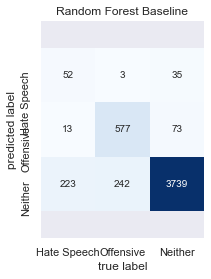

In [138]:
mat = confusion_matrix(y_test, rf_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Hate Speech', 'Offensive','Neither'], yticklabels=['Hate Speech', 'Offensive','Neither'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Random Forest Baseline')

# fixing matplotlib heatmap cutoff issue
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Baseline Naive Bayes

In [139]:
baseline_bayes = MultinomialNB(alpha = .01)

In [140]:
baseline_bayes.fit(tfidf_data_train, y_train)
bayes_test_preds = baseline_bayes.predict(tfidf_data_test)

In [141]:
bayes_accuracy = accuracy_score(y_test, bayes_test_preds)
bayes_precision = precision_score(y_test, bayes_test_preds, average = 'weighted')
bayes_recall = recall_score(y_test, bayes_test_preds, average='weighted')
bayes_f1_score = f1_score(y_test, bayes_test_preds,average='weighted')
bayes_f1_weighted = f1_score(y_test, bayes_test_preds, average='weighted')

In [142]:
# printing evaluation metrics up to 4th decimal place
print('Testing Metrics for Naive Bayes Baseline with Lemmatization Features')
print('Accuracy: {:.4}'.format(bayes_accuracy))
print('Precision: {:.4}'.format(bayes_precision))
print('Recall: {:.4}'.format(bayes_recall))
print('F1 Score: {:.4}'.format(bayes_f1_score))

Testing Metrics for Naive Bayes Baseline with Lemmatization Features
Accuracy: 0.8558
Precision: 0.8406
Recall: 0.8558
F1 Score: 0.8377


⏳ the cell below takes about 198ms to run

In [143]:
%%time
# training f1
bayes_accuracy_cv = cross_val_score(baseline_bayes, tfidf_data_train, y_train, scoring='accuracy', cv=5)
bayes_mean_cv = round(bayes_accuracy_cv.mean(), 6)

Wall time: 198 ms


In [144]:
bayes_fit = helpers.model_fit(bayes_mean_cv, bayes_accuracy)
bayes_fit

'underfit'

In [145]:
metric_dict['Baseline Naive Bayes'] = {'accuracy': bayes_accuracy,'precision': bayes_precision, 'recall': bayes_recall, 'f1_score': bayes_f1_score, 'weighted_f1': bayes_f1_weighted,'fit':bayes_fit}

(3.5, -0.5)

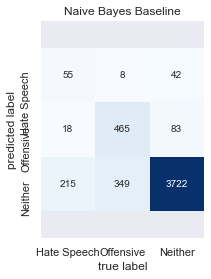

In [146]:
mat = confusion_matrix(y_test, bayes_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Hate Speech', 'Offensive','Neither'], yticklabels=['Hate Speech', 'Offensive','Neither'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Naive Bayes Baseline')

# fixing matplotlib heatmap cutoff issue
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

## Baseline SVM

In [147]:
SVM_baseline = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight='balanced')

In [148]:
%%time 
# this cell takes about 1 minute 30 seconds to run
# fit the training dataset on the classifier
SVM_baseline.fit(tfidf_data_train, y_train)
# predict the labels on validation dataset
SVM_test_preds = SVM_baseline.predict(tfidf_data_test)

Wall time: 1min 19s


In [149]:
SVM_accuracy = accuracy_score(y_test, SVM_test_preds)
SVM_precision = precision_score(y_test, SVM_test_preds,average='weighted')
SVM_recall = recall_score(y_test, SVM_test_preds, average='weighted')
SVM_f1_score = f1_score(y_test, SVM_test_preds,average='weighted')
SVM_f1_weighted = f1_score(y_test, SVM_test_preds, average='weighted')

In [150]:
# printing evaluation metrics up to 4th decimal place
print('Testing Metrics for SVM Baseline with Lemmatization Features')
print('Accuracy: {:.4}'.format(SVM_accuracy))
print('Precision: {:.4}'.format(SVM_precision))
print('Recall: {:.4}'.format(SVM_recall))
print('F1 Score: {:.4}'.format(SVM_f1_score))

Testing Metrics for SVM Baseline with Lemmatization Features
Accuracy: 0.9003
Precision: 0.9079
Recall: 0.9003
F1 Score: 0.9031


⏳ the cell below takes about 3 minutes 30 seconds to run

In [151]:
%%time
# training accuracy
base_SVM_accuracy_cv = cross_val_score(SVM_baseline, tfidf_data_train, y_train, scoring='accuracy', cv=5)
base_SVM_mean_cv = round(base_SVM_accuracy_cv.mean(), 6)

Wall time: 3min 30s


In [152]:
# is this model overfit or underfit?
base_SVM_fit = helpers.model_fit(base_SVM_mean_cv, SVM_accuracy)
base_SVM_fit

'underfit'

In [153]:
metric_dict['Baseline SVM'] = {'accuracy': SVM_accuracy, 'precision': SVM_precision, 'recall': SVM_recall, 'f1_score': SVM_f1_score, 'weighted_f1': SVM_f1_weighted,'fit':base_SVM_fit}

(3.5, -0.5)

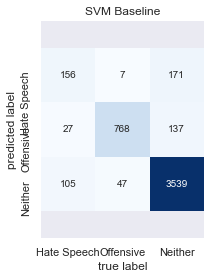

In [154]:
mat = confusion_matrix(y_test, SVM_test_preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Hate Speech', 'Offensive','Neither'], yticklabels=['Hate Speech', 'Offensive','Neither'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('SVM Baseline')

# fixing matplotlib heatmap cutoff issue
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

## Evaluation Metrics for All Baseline Models

In [155]:
pd.DataFrame.from_dict(metric_dict, orient='index')

,accuracy,precision,recall,f1_score,weighted_f1,fit
Baseline Random Forest,0.881178,0.868118,0.881178,0.865689,0.865689,NaN
Baseline Naive Bayes,0.855760,0.840618,0.855760,0.837698,0.837698,underfit
Baseline SVM,0.900343,0.907897,0.900343,0.903074,0.903074,underfit


In [292]:
## pickling X_train for future use
pickle_out = open(r"C:\Users\acer\Desktop\Final Project1\pickle\baseline_SVM.pkl","wb")
pickle.dump(SVM_baseline, pickle_out)
pickle_out.close()

In [298]:
read_svm = pd.read_pickle(r'C:\Users\acer\Desktop\Final Project1\pickle\baseline_SVM.pkl')
read_svm.head()

AttributeError: 'SVC' object has no attribute 'head'

AttributeError: 'SVC' object has no attribute 'head'

# Baseline with SMOTE
Used to over-sample the minority class (hate speech).

In [156]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=35)
smote_X_train, smote_y_train = sm.fit_resample(tfidf_data_train, y_train)
# sm = SMOTE(random_state=35)
# smote_X_train, smote_y_train = sm.fit_sample(tfidf_data_train, y_train)

In [157]:
smote_SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', random_state=15)

⏳ the cell below takes about 5 minutes 10 seconds to run

In [158]:
%%time
# this cell takes about 6 minutes to run
smote_SVM.fit(smote_X_train, smote_y_train)
smote_SVM_test_preds = smote_SVM.predict(tfidf_data_test)

Wall time: 5min 7s


In [159]:
smote_accuracy = accuracy_score(y_test, smote_SVM_test_preds)
smote_precision = precision_score(y_test, smote_SVM_test_preds, average='weighted')
smote_recall = recall_score(y_test, smote_SVM_test_preds, average='weighted')
smote_f1_score = f1_score(y_test, smote_SVM_test_preds, average='weighted')
smote_weighted_f1_score = f1_score(y_test, smote_SVM_test_preds, average='weighted')

In [160]:
# printing evaluation metrics up to 4th decimal place
print('Testing Metrics for Oversampled SVM Baseline with Lemmatization')
print('Accuracy: {:.4}'.format(smote_accuracy))
print('Precision: {:.4}'.format(smote_precision))
print('Recall: {:.4}'.format(smote_recall))
print('F1 Score: {:.4}'.format(smote_f1_score))
print('Weighted F1 Score: {:.4}'.format(smote_weighted_f1_score))

Testing Metrics for Oversampled SVM Baseline with Lemmatization
Accuracy: 0.8911
Precision: 0.8895
Recall: 0.8911
F1 Score: 0.8902
Weighted F1 Score: 0.8902


⏳ the cell below takes about 3 minutes 20 seconds to run

In [161]:
%%time
# training f1
base_SMOTE_cv = cross_val_score(smote_SVM, tfidf_data_train, y_train, scoring='accuracy', cv=5)
base_SVM_mean_cv = round(base_SMOTE_cv.mean(), 6)

Wall time: 3min 16s


In [162]:
SMOTE_fit = helpers.model_fit(base_SVM_mean_cv, smote_accuracy)
SMOTE_fit

'overfit'

In [163]:
# adding these metrics to evaluation metric dict
metric_dict['Baseline SVM Oversampled with SMOTE'] = {'accuracy': smote_accuracy, 'precision': smote_precision, 'recall': smote_recall, 'f1_score': smote_f1_score, 'weighted_f1': smote_weighted_f1_score,'fit':SMOTE_fit}

# Baseline with Tomek Links
Used to under-sample the majority class (offensive language).

In [164]:
from collections import Counter
from imblearn.under_sampling import TomekLinks # doctest: +NORMALIZE_WHITESPACE

tl = TomekLinks()
tomek_X_train, tomek_y_train = tl.fit_resample(tfidf_data_train, y_train)
print('Resampled dataset shape %s' % Counter(tomek_y_train))

Resampled dataset shape Counter({'Offensive Language': 15284, 'Neither Hate Nor Offensive': 3310, 'Hate Speech': 1142})


In [165]:
tomek_SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', random_state=15)

⏳ the cell below takes about 1 minutes 15 seconds to run

In [166]:
%%time
# this cell takes 42 seconds to run
tomek_SVM.fit(tomek_X_train, tomek_y_train)
tomek_svm_preds = tomek_SVM.predict(tfidf_data_test)

Wall time: 1min 14s


In [167]:
tomek_accuracy = accuracy_score(y_test, tomek_svm_preds)
tomek_precision = precision_score(y_test, tomek_svm_preds, average='micro')
tomek_recall = recall_score(y_test, tomek_svm_preds, average='micro')
tomek_f1_score = f1_score(y_test, tomek_svm_preds, average='micro')
tomek_weighted_f1_score = f1_score(y_test, tomek_svm_preds, average='micro')

In [168]:
# printing evaluation metrics up to 4th decimal place
print('Testing Metrics for Undersampled SVM Baseline with Lemmatization')
print('Accuracy: {:.4}'.format(tomek_accuracy))
print('Precision: {:.4}'.format(tomek_precision))
print('Recall: {:.4}'.format(tomek_recall))
print('F1 Score: {:.4}'.format(tomek_f1_score))
print('F1 Score Weighted: {:.4}'.format(tomek_weighted_f1_score))

Testing Metrics for Undersampled SVM Baseline with Lemmatization
Accuracy: 0.9086
Precision: 0.9086
Recall: 0.9086
F1 Score: 0.9086
F1 Score Weighted: 0.9086


⏳ the cell below takes about 2 minutes to run

In [169]:
%%time
# training f1
base_TOMEK_cv = cross_val_score(smote_SVM, tfidf_data_train, y_train, scoring='accuracy', cv=5)
base_SVM_mean_cv = round(base_TOMEK_cv.mean(), 6)

Wall time: 3min 11s


In [170]:
TOMEK_fit = helpers.model_fit(base_SVM_mean_cv, tomek_accuracy)
TOMEK_fit

'underfit'

In [171]:
# adding these metrics to evaluation metric dict
metric_dict['Baseline SVM Undersampled with Tomek Links'] = {'accuracy': tomek_accuracy,'precision': tomek_precision, 'recall': tomek_recall, 'f1_score': tomek_f1_score, 'weighted_f1': tomek_weighted_f1_score,'fit':base_SVM_fit}

# ## Metrics for All Baselines

In [172]:
pd.DataFrame.from_dict(metric_dict, orient='index')

,accuracy,precision,recall,f1_score,weighted_f1,fit
Baseline Random Forest,0.881178,0.868118,0.881178,0.865689,0.865689,NaN
Baseline Naive Bayes,0.855760,0.840618,0.855760,0.837698,0.837698,underfit
Baseline SVM,0.900343,0.907897,0.900343,0.903074,0.903074,underfit
Baseline SVM Oversampled with SMOTE,0.891063,0.889452,0.891063,0.890189,0.890189,overfit
Baseline SVM Undersampled with Tomek Links,0.908614,0.908614,0.908614,0.908614,0.908614,underfit


In [173]:
from sklearn.metrics import classification_report
target_names = ['Hate', 'Offensive','No hate and offense']
# class_weight='balanced' Baseline report
print(classification_report(y_test, SVM_test_preds, target_names=target_names))
# Undersampled Baseline report
print(classification_report(y_test, tomek_svm_preds, target_names=target_names))

                     precision    recall  f1-score   support

               Hate       0.47      0.54      0.50       288
          Offensive       0.82      0.93      0.88       822
No hate and offense       0.96      0.92      0.94      3847

           accuracy                           0.90      4957
          macro avg       0.75      0.80      0.77      4957
       weighted avg       0.91      0.90      0.90      4957

                     precision    recall  f1-score   support

               Hate       0.62      0.33      0.43       288
          Offensive       0.86      0.87      0.87       822
No hate and offense       0.93      0.96      0.94      3847

           accuracy                           0.91      4957
          macro avg       0.80      0.72      0.75      4957
       weighted avg       0.90      0.91      0.90      4957



# ## Count Vectorization

Count Vectorization is similar to TF-IDF Vectorization, but it simply counts the number of times each word appears in a document. Therefore, each individual tweet becomes a single vector where each element in the vector corresponds to the count of a unique word.

It's worth noting that when we vectorize text in this way, we lose the order that the sentences were in. This is known as the **Bag of Words** appraoch, because all of the tokenized words in the corpus are thrown into a "bag" of vectors for the model to "understand."

In [220]:
# fresh TTS
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem, test_size=0.20, random_state=50)

In [221]:
# instantiating count vectorizer
count = CountVectorizer(stop_words=stop_words)

In [222]:
# fitting to the train and test set
X_train_count = count.fit_transform(X_train)
X_test_count = count.transform(X_test)

## Baseline Linear SVM with Count Vectorization


In [223]:
count_SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight='balanced')

In [ ]:
%%time 
# fit the training dataset on the classifier
count_SVM.fit(X_train_count, y_train)
# predict the labels bon validation dataset
count_SVM_test_preds = count_SVM.predict(X_test_count)

In [226]:
count_SVM_accuracy = accuracy_score(y_test, count_SVM_test_preds)
count_SVM_precision = precision_score(y_test, count_SVM_test_preds, average='weighted')
count_SVM_recall = recall_score(y_test, count_SVM_test_preds, average='weighted')
count_SVM_f1_score = f1_score(y_test, count_SVM_test_preds, average='weighted')
count_SVM_f1_weighted = f1_score(y_test, count_SVM_test_preds, average='weighted')

# printing scores
helpers.evaluation(count_SVM_accuracy, count_SVM_precision, count_SVM_recall, count_SVM_f1_score, count_SVM_f1_weighted)

ValueError: Found input variables with inconsistent numbers of samples: [4957, 7435]

# Over-Sampling with SMOTE
This method over-samples the minority class, "Hate Speech".

Rather than simply oversampling the minority class with replacement (which adds duplicate cases to the dataset), the algorithm generates new sample data by creating ‘synthetic’ examples that are combinations of the closest minority class cases.

After synthetically resampling our data, we no longer need to lean on penalized class weights in order to improve our model tuning.

In [227]:
# generating new sample data from original TF-IDF vectorized data
# sm = SMOTE(random_state=40)
# smote_X_train, smote_y_train = sm.fit_sample(X_train_count, y_train)
oversample = SMOTE(random_state=40)
smote_X_train, smote_y_train = oversample.fit_resample(X_train_count, y_train)

In [228]:
# feeding in best log reg model
smote_SVM = svm.SVC(C=1.0, random_state=55)

⏳ the cell below takes about 3 minutes to run

In [229]:
# %%time
# smote_SVM.fit(smote_X_train, smote_y_train)
# smote_SVM_test_preds = smote_SVM.predict(X_test_count)

In [230]:
smote_accuracy = accuracy_score(y_test, smote_SVM_test_preds)
smote_precision = precision_score(y_test, smote_SVM_test_preds, average='weighted')
smote_recall = recall_score(y_test, smote_SVM_test_preds,average='weighted')
smote_f1_score = f1_score(y_test, smote_SVM_test_preds,average='weighted')
smote_weighted_f1_score = f1_score(y_test, smote_SVM_test_preds, average='weighted')

# printing scores
helpers.evaluation(smote_accuracy,smote_precision, smote_recall, smote_f1_score, smote_weighted_f1_score)

ValueError: Found input variables with inconsistent numbers of samples: [4957, 7435]

In [231]:
# %%time
# # training f1
# smote_accuracy_cv = cross_val_score(smote_SVM, smote_X_train, smote_y_train, scoring='accuracy', cv=5)
# smote_accuracy_mean_cv = round(smote_accuracy_cv.mean(), 6)

In [232]:
# # is this model overfit or underfit?
# smote_fit = helpers.model_fit(smote_accuracy_mean_cv, smote_accuracy)
# smote_fit

In [233]:
# adding these metrics to evaluation metric dict
metric_dict['SVM Oversampled - CountVectorizer'] = {'accuracy': smote_accuracy,'precision': smote_precision, 'recall': smote_recall, 'f1_score': smote_f1_score, 'weighted_f1': smote_weighted_f1_score}

# Under-Sampling with Tomek Links
This method under-samples the majoirty class, "Offensive" and "Neither"

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [234]:
# resampling original TF-IDF vectorized data
tl = TomekLinks()
tomek_X_train, tomek_y_train = tl.fit_resample(X_train_count, y_train)
print('Resampled dataset shape %s' % Counter(tomek_y_train))

Resampled dataset shape Counter({'Offensive Language': 15297, 'Neither Hate Nor Offensive': 3318, 'Hate Speech': 1142})


In [235]:
tomek_SVM = svm.SVC(C=1.0, random_state=55)

In [236]:
%%time
tomek_SVM.fit(tomek_X_train, tomek_y_train)
tomek_SVM_test_preds = tomek_SVM.predict(X_test_count)

Wall time: 37.7 s


In [237]:
tomek_accuracy = accuracy_score(y_test, tomek_SVM_test_preds)
tomek_precision = precision_score(y_test, tomek_SVM_test_preds, average='weighted')
tomek_recall = recall_score(y_test, tomek_SVM_test_preds, average='weighted')
tomek_f1_score = f1_score(y_test, tomek_SVM_test_preds, average='weighted')
tomek_weighted_f1_score = f1_score(y_test, tomek_SVM_test_preds, average='weighted')

# printing scores
helpers.evaluation(tomek_accuracy,tomek_precision, tomek_recall, tomek_f1_score, tomek_weighted_f1_score)

Testing Set Evaluation Metrics:
Accuracy: 0.9007
Precision: 0.8906
Recall: 0.9007
F1 Score: 0.8838
Weighted F1 Score: 0.8838


⏳ the cell below takes about 9 minutes to run

In [238]:
# %%time
# # training f1
# tomek_accuracy_cv = cross_val_score(tomek_SVM, tomek_X_train, tomek_y_train, scoring='accuracy', cv=5)
# tomek_mean_cv = round(tomek_accuracy_cv.mean(), 6)

In [239]:
# # is this model overfit or underfit?
# tomek_fit = helpers.model_fit(tomek_mean_cv, tomek_accuracy)
# tomek_fit

In [240]:
# adding these metrics to evaluation metric dict
metric_dict['SVM Undersampled - CountVectorizer'] = {'accuracy': tomek_accuracy, 'precision': tomek_precision, 'recall': tomek_recall, 'f1_score': tomek_f1_score, 'weighted_f1': tomek_weighted_f1_score}

In [241]:
# printing dict for testing set metrics
pd.DataFrame.from_dict(metric_dict, orient='index')

,accuracy,precision,recall,f1_score,weighted_f1,fit
Baseline Random Forest,0.881178,0.868118,0.881178,0.865689,0.865689,NaN
Baseline Naive Bayes,0.855760,0.840618,0.855760,0.837698,0.837698,underfit
Baseline SVM,0.900343,0.907897,0.900343,0.903074,0.903074,underfit
Baseline SVM Oversampled with SMOTE,0.891063,0.889452,0.891063,0.890189,0.890189,overfit
Baseline SVM Undersampled with Tomek Links,0.908614,0.908614,0.908614,0.908614,0.908614,underfit
SVM Oversampled - CountVectorizer,0.641291,0.627667,0.641291,0.634260,0.634260,NaN
SVM Undersampled - CountVectorizer,0.900746,0.890641,0.900746,0.883781,0.883781,NaN


## Grid Search

The `sklearn` library provides an easy way to tune model parameters through an exhuastive search using `GridSearchCV`. It combines K-Fold Cross Validation with a grid search of hyperparameters.

A full list of an SVC model's hyperparameters can be found in the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

With this grid search, I aimed to improve the C and Gamma, and seeing if any other kernels outperform the Linear kernel.

- More information about selecting the right C and gamma can be found in [this](https://www.quora.com/What-are-C-and-gamma-with-regards-to-a-support-vector-machine) Quora post.
- More information about selecting the right SVM Kernel can be found in [this](https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200) TowardsDataScience article.

The following hyperparamter dictionary was used and the grid search took about **48 minutes** to run. 

**Grid Searched Parameters:**
- 'C': [1, 10, 100]
- 'gamma': [0.1, 0.01, 0.001]
- 'kernel': ['rbf', 'sigmoid']

For the sake of reproducibility, the tuned model is below. The full code can be found in the `SVM.ipynb` notebook.

In [242]:
# # creating the model
# baseline_model = svm.SVC(degree=3, class_weight='balanced', random_state=20)

In [243]:
# # creating param_dict
# param_dict={'C': [1, 10, 100],  
#               'gamma': [0.1, 0.01, 0.001], 
#               'kernel': ['rbf', 'sigmoid']}

In [244]:
# # instantiate Grid Search CV with F1 metric
# grid_baseline = GridSearchCV(baseline_model, param_dict, cv=5, scoring='f1', verbose=3)

In [245]:
# %%time
# # fit the grid search to our data
# grid_baseline.fit(tfidf_data_train, y_train)

# # this cell takes 48 minutes to run

In [246]:
# # generate score with .best_score_ and hyperparemeters with .best_params_
# print('F1 Score:', grid_baseline.best_score_)
# print('Best Hyperparameters:', grid_baseline.best_params_)
# print('Model object with best parameters: ')
# print(grid_baseline.best_estimator_)

In [247]:
# # Predict the response for test dataset
# grid_base_y_pred_train = grid_baseline.best_estimator_.predict(tfidf_data_train)

# # predict the training set
# grid_base_y_pred_test = grid_baseline.best_estimator_.predict(tfidf_data_test)

# # Model F1, how often is the classifier correct?
# print('Tuned SVM Model Predictions')
# print("F1 on train set:",metrics.f1_score(y_train, grid_base_y_pred_train))
# print("F1 on test set:",metrics.f1_score(y_test, grid_base_y_pred_test))

In [248]:
# # setting variables for evaluation metrics
# grid_accuracy = accuracy_score(y_test, grid_base_y_pred_test)
# grid_precision = precision_score(y_test, grid_base_y_pred_test)
# grid_recall = recall_score(y_test, grid_base_y_pred_test)
# grid_f1_score = f1_score(y_test, grid_base_y_pred_test)
# grid_weighted_f1_score = f1_score(y_test, grid_base_y_pred_test, average='weighted')

In [249]:
# # adding these metrics to evaluation metric dict
# metric_dict['Grid Search SVM'] = {'accuracy': grid_accuracy, 'precision': grid_precision, 'recall': grid_recall, 'f1_score': grid_f1_score, 'weighted_f1': grid_weighted_f1_score}

In [250]:
# # comparing with other models
# pd.DataFrame.from_dict(metric_dict, orient='index')

## Pickling Final Model

This final model will be pickled for future use. 

In [251]:
pickle_out = open("./pickle/final_SVM_count_model.pkl","wb")
pickle.dump(count_SVM, pickle_out)
pickle_out.close()

## Evaluation Metrics for Testing Set

These scores give us a sense of how the model will perform on unseen data.

In [252]:
helpers.evaluation(tomek_accuracy,tomek_precision, tomek_recall, tomek_f1_score, tomek_weighted_f1_score)

Testing Set Evaluation Metrics:
Accuracy: 0.9007
Precision: 0.8906
Recall: 0.9007
F1 Score: 0.8838
Weighted F1 Score: 0.8838


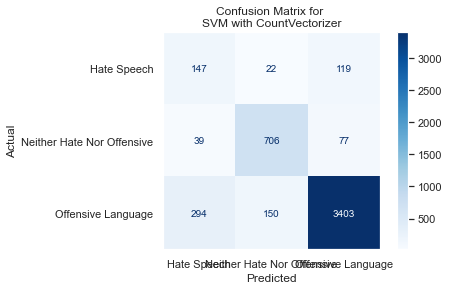

In [253]:
# generating standard confusion matrix
SVM_conf_matrix = plot_confusion_matrix(count_SVM, X_test_count, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues)
SVM_conf_matrix.ax_.set_title('Confusion Matrix for \nSVM with CountVectorizer')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.savefig('./visualizations/SVM_count_matrix.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

From this confusion matrix, we can see that the True Negative rate is high, but the True Positive rate is much lower. **Let's normalize these values to get a better sense of this relationship.**

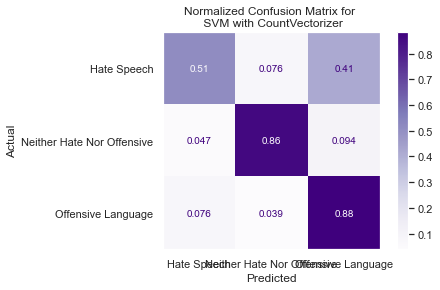

In [254]:
# generating normalized confusion matrix
SVM_conf_matrix = plot_confusion_matrix(count_SVM, X_test_count, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Purples,
                                 normalize='true')
SVM_conf_matrix.ax_.set_title('Normalized Confusion Matrix for \n SVM with CountVectorizer')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.savefig('./visualizations/normalized_log_reg_countvec_matrix.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

So as expected, the final model has a True Negative Rate of 91% and a True Positive Rate of 62%.

This is consistent with the final model's evaluation metrics, where it got a Recall of .624, aka the True Positive Rate. In this business context, we would ideally want as many True Positives as possible, because that would be identifying Hate Speech correctly. Therefore, this is where the final model could be improved.

Also, we can see that only 8.9% of predictions are False Positives. Which mean that they were classified as "Hate Speech" when it's not. It's great that this amount is low, because site users tend to launch complaint reports when their content is over-flagged as hate speech content when it's not.

Overall, the Recall of this model needs to be greatly improved, in addition to the F1 of 0.3958.

In [255]:
# x_train=np.arange(0,len(tomek_X_train),1).shape[0]
# plt.scatter(x_train, tomek_y_train)
# plt.show()

In [256]:
# importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
import pickle

# NLP libraries
import nltk
from sklearn.feature_extraction import text 
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords


# modeling libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter
from sklearn import metrics, utils, model_selection, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, classification_report

In [257]:
# custom fuctions

import sys
sys.path.insert(0, '../src')
# module_path = sys.path.insert(0, '../src')

# if module_path not in sys.path:
#     sys.path.append(module_path)

import helper_functions as helpers

## Alternative Feature Engineering Method: Count Vectorization

In [258]:
X_lem = pickle.load(open(r'C:\Users\acer\Desktop\Final Project1\pickle\X_lem.pkl', 'rb'))
y_lem = pd.read_pickle(r'C:\Users\acer\Desktop\Final Project1\pickle\y_lem.pkl')

In [259]:
# setting up stop words
stop_words = set(stopwords.words('english'))

### TTS & CountVectorize

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X_lem, y_lem,  test_size=0.20, random_state=50)

In [261]:
# using count vectorizor
count = CountVectorizer(stop_words=stop_words)

In [262]:
# fitting to the train and test set
X_train_count = count.fit_transform(X_train)
X_test_count = count.transform(X_test)

In [263]:
## pickling X_train for future use
pickle_out = open(r"C:\Users\acer\Desktop\Final Project1\pickle\X_train_2.pkl","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

### Linear SVM Model (MVP)

In [264]:
SVM_baseline = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight='balanced')

In [265]:
%%time 
# 20 seconds to run

# fit the training dataset on the classifier
SVM_baseline.fit(X_train_count, y_train)
# predict the labels on validation dataset
SVM_test_preds = SVM_baseline.predict(X_test_count)

Wall time: 16.3 s


In [266]:
SVM_accuracy = accuracy_score(y_test, SVM_test_preds)
SVM_precision = precision_score(y_test, SVM_test_preds, average='weighted')
SVM_recall = recall_score(y_test, SVM_test_preds, average='weighted')
SVM_f1_score = f1_score(y_test, SVM_test_preds, average='weighted')
SVM_f1_weighted = f1_score(y_test, SVM_test_preds, average='weighted')

# printing scores
helpers.evaluation(SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score, SVM_f1_weighted)

Testing Set Evaluation Metrics:
Accuracy: 0.8586
Precision: 0.8849
Recall: 0.8586
F1 Score: 0.8693
Weighted F1 Score: 0.8693


In [267]:
target_names = ['class 0', 'class 1','class 2']
print('-'*7 + ' SVM Baseline with Count Vectorizor ' + '-'*6)
print(classification_report(y_test, SVM_test_preds, target_names=target_names))

------- SVM Baseline with Count Vectorizor ------
              precision    recall  f1-score   support

     class 0       0.31      0.51      0.38       288
     class 1       0.80      0.86      0.83       822
     class 2       0.95      0.88      0.91      3847

    accuracy                           0.86      4957
   macro avg       0.69      0.75      0.71      4957
weighted avg       0.88      0.86      0.87      4957



If we compare the classification report for both models, it's worth noting that this model predicts the "Hate Speech" label slightly worse than the original.

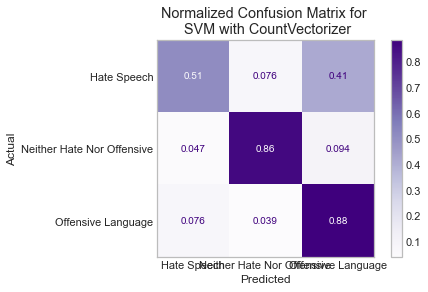

In [291]:
# generating normalized confusion matrix
SVM_conf_matrix = plot_confusion_matrix(SVM_baseline, X_test_count, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Purples,
                                 normalize='true')
SVM_conf_matrix.ax_.set_title('Normalized Confusion Matrix for \n SVM with CountVectorizer')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.savefig(r'C:\Users\acer\Desktop\Final Project\visualizations\normalized_count_log_reg_matrix.png', bbox_inches = "tight", pad_inches=1)
plt.show()

In [269]:

sm = SMOTE(random_state=45)
smote_X_train, smote_y_train = sm.fit_resample(X_train_count, y_train)

In [270]:
smote_svm = svm.SVC(C=1.0, random_state=55)

In [271]:
%%time
smote_svm.fit(smote_X_train, smote_y_train)
smote_svm_test_preds = smote_svm.predict(X_test_count)

Wall time: 2min 59s


In [272]:
smote_accuracy = accuracy_score(y_test, smote_svm_test_preds)
smote_precision = precision_score(y_test, smote_svm_test_preds, average='weighted')
smote_recall = recall_score(y_test, smote_svm_test_preds, average='weighted')
smote_f1_score = f1_score(y_test,smote_svm_test_preds, average='weighted')
smote_weighted_f1_score = f1_score(y_test,smote_svm_test_preds, average='weighted')

helpers.evaluation(smote_accuracy, smote_precision, smote_recall, smote_f1_score, smote_weighted_f1_score)

Testing Set Evaluation Metrics:
Accuracy: 0.8318
Precision: 0.8377
Recall: 0.8318
F1 Score: 0.8338
Weighted F1 Score: 0.8338


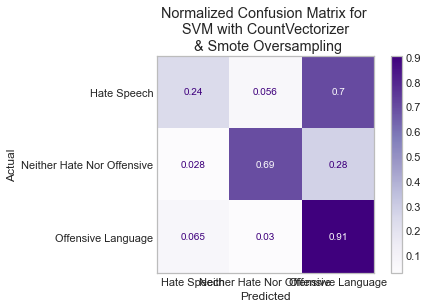

In [273]:
# generating normalized confusion matrix
SVM_conf_matrix = plot_confusion_matrix(smote_svm, X_test_count, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Purples,
                                 normalize='true')
SVM_conf_matrix.ax_.set_title('Normalized Confusion Matrix for \n SVM with CountVectorizer \n & Smote Oversampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
# plt.savefig('./visualizations/normalized_count_log_reg_matrix.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

In [274]:
tl = TomekLinks()
tomek_X_train, tomek_y_train = tl.fit_resample(X_train_count, y_train)
print('Resampled dataset shape %s' % Counter(tomek_y_train))

Resampled dataset shape Counter({'Offensive Language': 15297, 'Neither Hate Nor Offensive': 3318, 'Hate Speech': 1142})


In [275]:
tomek_svm = svm.SVC(C=1.0, random_state=55)

In [276]:
%%time
tomek_svm.fit(tomek_X_train, tomek_y_train)
tomek_svm_test_preds = tomek_svm.predict(X_test_count)

Wall time: 40.1 s


In [277]:
tomek_accuracy = accuracy_score(y_test, tomek_svm_test_preds)
tomek_precision = precision_score(y_test,tomek_svm_test_preds, average='weighted')
tomek_recall = recall_score(y_test, tomek_svm_test_preds, average='weighted')
tomek_f1_score = f1_score(y_test,tomek_svm_test_preds, average='weighted')
tomek_weighted_f1_score = f1_score(y_test, tomek_svm_test_preds, average='weighted')

helpers.evaluation(tomek_accuracy, tomek_precision, tomek_recall, tomek_f1_score, tomek_weighted_f1_score)

Testing Set Evaluation Metrics:
Accuracy: 0.9007
Precision: 0.8906
Recall: 0.9007
F1 Score: 0.8838
Weighted F1 Score: 0.8838


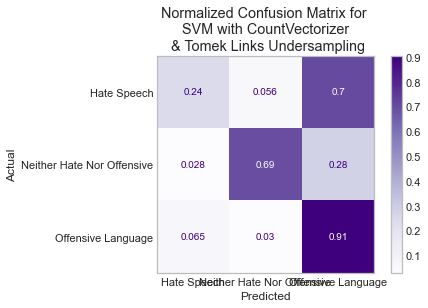

In [278]:
# generating normalized confusion matrix
SVM_conf_matrix = plot_confusion_matrix(smote_svm, X_test_count, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Purples,
                                 normalize='true')
SVM_conf_matrix.ax_.set_title('Normalized Confusion Matrix for \n SVM with CountVectorizer \n & Tomek Links Undersampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
# plt.savefig('./visualizations/normalized_count_log_reg_matrix.png', bbox_inches = "tight", pad_inches=.5)
plt.show()

In [279]:
# creating the model
baseline_svm = svm.SVC(C=1.0, random_state=50)

In [280]:
# creating param_dict
param_dict={ 'C':[100, 10, 1.0, 0.1, 0.01],'gamma': [0.1, 0.01, 0.001],'kernel': ['rbf', 'sigmoid']}

In [281]:
# instantiate Grid Search CV with F1 metric
grid_svm = GridSearchCV(SVM_baseline, param_dict, cv=5, scoring='accuracy', verbose=1)

In [282]:
%%time
# fit the grid search to our data
grid_svm.fit(X_train_count, y_train)

# this cell takes 15S minutes to run

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Wall time: 53min 27s


GridSearchCV(cv=5,
             estimator=SVC(class_weight='balanced', gamma='auto',
                           kernel='linear'),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [283]:
# generate score with .best_score_ and hyperparemeters with .best_params_
print('F1 Score:', grid_svm.best_score_)
print('Best Hyperparameters:', grid_svm.best_params_)
print('Model object with best parameters: ')
print(grid_svm.best_estimator_)

F1 Score: 0.8898919758680183
Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Model object with best parameters: 
SVC(C=10, class_weight='balanced', gamma=0.1)


In [284]:
# Predict the response for test dataset
grid_base_y_pred_train = grid_svm.best_estimator_.predict(X_train_count)

# predict the training set
grid_base_y_pred_test = grid_svm.best_estimator_.predict(X_test_count)

In [285]:
tuned_base_accuracy = accuracy_score(y_test, grid_base_y_pred_test)
tuned_base_precision = precision_score(y_test, grid_base_y_pred_test, average='micro')
tuned_base_recall = recall_score(y_test, grid_base_y_pred_test, average='micro')
tuned_base_f1_score = f1_score(y_test, grid_base_y_pred_test, average='micro')
tuned_weighted_f1_score = f1_score(y_test, tomek_logreg_test_preds, average='micro')

helpers.evaluation(tuned_base_accuracy, tuned_base_precision, tuned_base_recall, tuned_base_f1_score, tuned_weighted_f1_score)

Testing Set Evaluation Metrics:
Accuracy: 0.8951
Precision: 0.8951
Recall: 0.8951
F1 Score: 0.8951
Weighted F1 Score: 0.9086


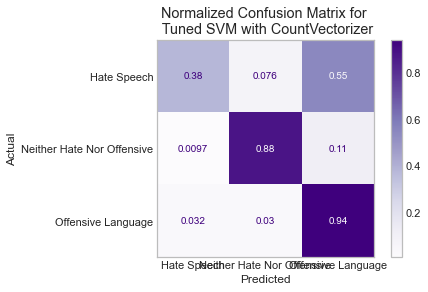

In [286]:
# generating normalized confusion matrix
SVM_conf_matrix = plot_confusion_matrix(grid_svm, X_test_count, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Purples,
                                 normalize='true')
SVM_conf_matrix.ax_.set_title('Normalized Confusion Matrix for \n Tuned SVM with CountVectorizer')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid(False)
plt.savefig(r'C:\Users\acer\Desktop\Final Project1\visualizations\tuned_normalized_count_svm_matrix.png', bbox_inches = "tight", pad_inches=.5, facecolor='w')
plt.show()

In [287]:
%%time
# training f1
tuned_accuracy_cv = cross_val_score(SVM_baseline, X_train_count, y_train, scoring='accuracy', cv=5)
tuned_mean_cv = round(tuned_accuracy_cv.mean(), 6)

Wall time: 44.4 s


In [288]:
tuned_fit = helpers.model_fit(tuned_mean_cv, tuned_base_accuracy)
tuned_fit

'underfit'

In [289]:
# cross validated accuracy score for training set
print('Training accuracy Score: {:.5}'.format(tuned_mean_cv))
# uniform accuracy score for testing set
print('Testing accuracy Score: {:.5}'.format(tuned_base_accuracy))

Training accuracy Score: 0.8617
Testing accuracy Score: 0.8951


In [290]:
%%time
# training f1
tuned_f1_cv = cross_val_score(SVM_baseline, X_train_count, y_train, scoring='f1', cv=5)
tuned_mean_cv = round(tuned_f1_cv.mean(), 6)

Wall time: 44.4 s


All of these evaluation metric methods reiterate that the tuned model is exactly the same as the baseline model. .